In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

sns.set()


# EXPLORATORY ANALYSIS

In [2]:
def import_files(directory_path):
    csv_files = glob(os.path.join(directory_path, '*.csv'))
    
    df_dict = {}
    for csv_file in csv_files:
        file_name = os.path.basename(csv_file)
        print(file_name)
        df = pd.read_csv(csv_file,index_col= 'id' )
        df_dict[file_name] = df

    
    return df_dict
df_dict = import_files(os.getcwd())
client_df = df_dict.get('client_data.csv')
price_df = df_dict.get('price_data.csv')


clean_data_after_eda.csv
client_data.csv
price_data.csv


In [3]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14606 entries, 24011ae4ebbe3035111d65fa7c15bc57 to 563dde550fd624d7352f3de77c0cdfcd
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channel_sales                   14606 non-null  object 
 1   cons_12m                        14606 non-null  int64  
 2   cons_gas_12m                    14606 non-null  int64  
 3   cons_last_month                 14606 non-null  int64  
 4   date_activ                      14606 non-null  object 
 5   date_end                        14606 non-null  object 
 6   date_modif_prod                 14606 non-null  object 
 7   date_renewal                    14606 non-null  object 
 8   forecast_cons_12m               14606 non-null  float64
 9   forecast_cons_year              14606 non-null  int64  
 10  forecast_discount_energy        14606 non-null  float64
 11  forecast_meter_rent_12m         14606 no

From the above we can tell that both our data frames have no missing value

We have date columns that are not in their correct data typesb

In [4]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


### From the above data descrive function we could see like our data is very large max values, this implies that we might need a standard scaller when training or model

churn
0    0.903
1    0.097
Name: proportion, dtype: float64


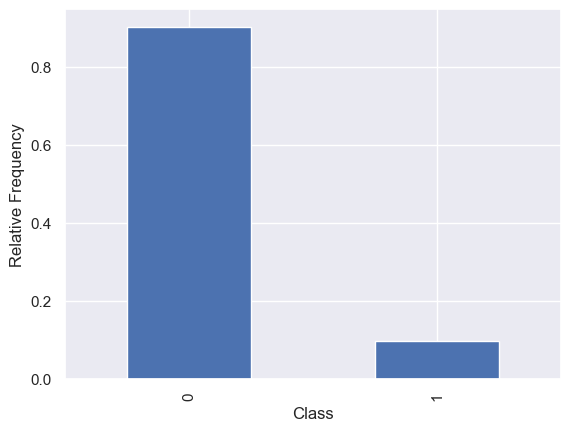

In [5]:
## Have a look at the churn frequency distribution
print(round(client_df['churn'].value_counts(normalize = True), 3))
client_df['churn'].value_counts(normalize = True).plot(kind = 'bar',
                                                        xlabel =  'Class',
                                                        ylabel = 'Relative Frequency'
                                                        
);


### Let's Check for multicolinearity between feature matrix columns and their correllation to target vector 

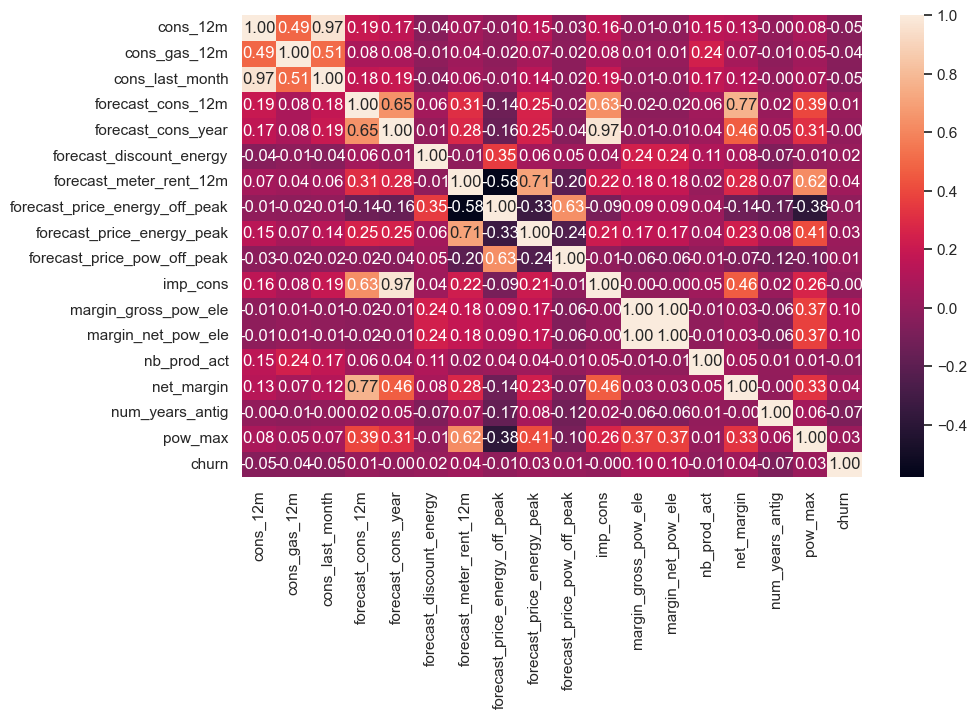

In [6]:
plt.figure(figsize=(10, 6))
correlation = client_df.select_dtypes('number').corr()
sns.heatmap(correlation, annot=True, fmt=".2f");

##### Collumns with high multicolinearity
1. cons_12m vs forecast_cons_12m
2. forecast_cons_year vs forecast_cons_12m
3. imp_cons vs forecast_cons_year
4. imp_cons vs forecast_cons_12m
5. net_margin vs forecast_cons_year
6. margin_gross_pow_ele vs margin_net_pow_ele



In [7]:
# Let's just take the column that have a multicolinearity of 0.97
# Columns with multicolinearity let's check their correlation to the target vector
print(f"churn vs cons_last_month {client_df['churn'].corr(client_df['cons_last_month'])}")
print(f"churn vs cons_12m {client_df['churn'].corr(client_df['cons_12m'])}")
print(f"churn vs imp_cons{client_df['churn'].corr(client_df['imp_cons'])}")
print(f"churn vs forecast_cons_year{client_df['churn'].corr(client_df['forecast_cons_year'])}")


churn vs cons_last_month -0.04528429556494653
churn vs cons_12m -0.045967832406690744
churn vs imp_cons-0.0015832560229591737
churn vs forecast_cons_year-0.002557568362017978


In [8]:
# Columns we might drop due to multi colinearity
column_to_drop_due_to_multicollinearity = ['cons_last_month', 'imp_cons']

In [9]:
client_df.select_dtypes('object').nunique()

channel_sales         8
date_activ         1796
date_end            368
date_modif_prod    2129
date_renewal        386
has_gas               2
origin_up             6
dtype: int64

### Let's see how each element in channel sale and origin up influence churn

In [10]:
channel_sales_pivot = pd.pivot_table(
    client_df, index = 'channel_sales', values = 'churn', aggfunc = np.mean    
).sort_values(by  = 'churn')

channel_sales_pivot

,churn
channel_sales,
epumfxlbckeskwekxbiuasklxalciiuu,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000
lmkebamcaaclubfxadlmueccxoimlema,0.055887
MISSING,0.075973
ewpakwlliwisiwduibdlfmalxowmwpci,0.083987
usilxuppasemubllopkaafesmlibmsdf,0.100364
foosdfpfkusacimwkcsosbicdxkicaua,0.121410


In [11]:
origin_up_pivot = pd.pivot_table(
    client_df, index = 'origin_up', values = 'churn', aggfunc = np.mean    
).sort_values(by  = 'churn')

origin_up_pivot

,churn
origin_up,
ewxeelcelemmiwuafmddpobolfuxioce,0.000000
usapbepcfoloekilkwsdiboslwaxobdp,0.000000
kamkkxfxxuwbdslkwifmmcsiusiuosws,0.060084
MISSING,0.062500
ldkssxwpmemidmecebumciepifcamkci,0.083863
lxidpiddsbxsbosboudacockeimpuepw,0.125828


### Check for columns with high cardinality

In [12]:
client_df.nunique()

channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698
churn                                 2


## Key function we will be reusing through out our analysis

In [13]:

# Fuction that checks colums
def check_columns(df, name_to_check):
    
    column_names = []
    for col_name in df.columns:
        if name_to_check in col_name:
            column_names.append(col_name)
    return column_names

# Function that pairs columns
def paired_df (column_name_list):

    df_dict = {}
    for col in column_name_list:
        df_dict[col] = []
        pair_df = client_df[[col, 'churn']]
        df_dict[col].append(pair_df)
        
    return df_dict

# Function that make histogram data frames
def histogram_dataframes(dataframe_dictionery):
    histogram_dfs =  {}
    for df_names, dfs in dataframe_dictionery.items():
        histogram_dfs[df_names] = []
        for df in dfs:
            retention = df[df['churn'] == 0].iloc[:, 0]  # Select the first column
            churn = df[df['churn'] == 1].iloc[:, 0]      # Select the first column
            combined_df = pd.concat([retention, churn], axis=1, keys=['Retention', 'Churn'])
            histogram_dfs[df_names].append(combined_df)
    return histogram_dfs

# funtion that plots stacked histograms 
def stacked_histogram(data, labels, colors, bins, xlabel, ylabel, title):
    """
    Parameters:
        data (list of arrays): List of arrays containing the data for each histogram.
        labels (list of str): Labels for each histogram.
        colors (list of str): Colors for each histogram.
        bins (int or sequence of scalars or str): Specification of histogram bins.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(15, 6))
    plt.hist(data, bins=bins, stacked=True, label=labels, color=colors)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,fontsize = 14, weight = "bold")
    plt.legend()
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

    

##### Check how 'channel_sales', 'has_gas', 'origin_up' influence retention and  in a visual reperesentation

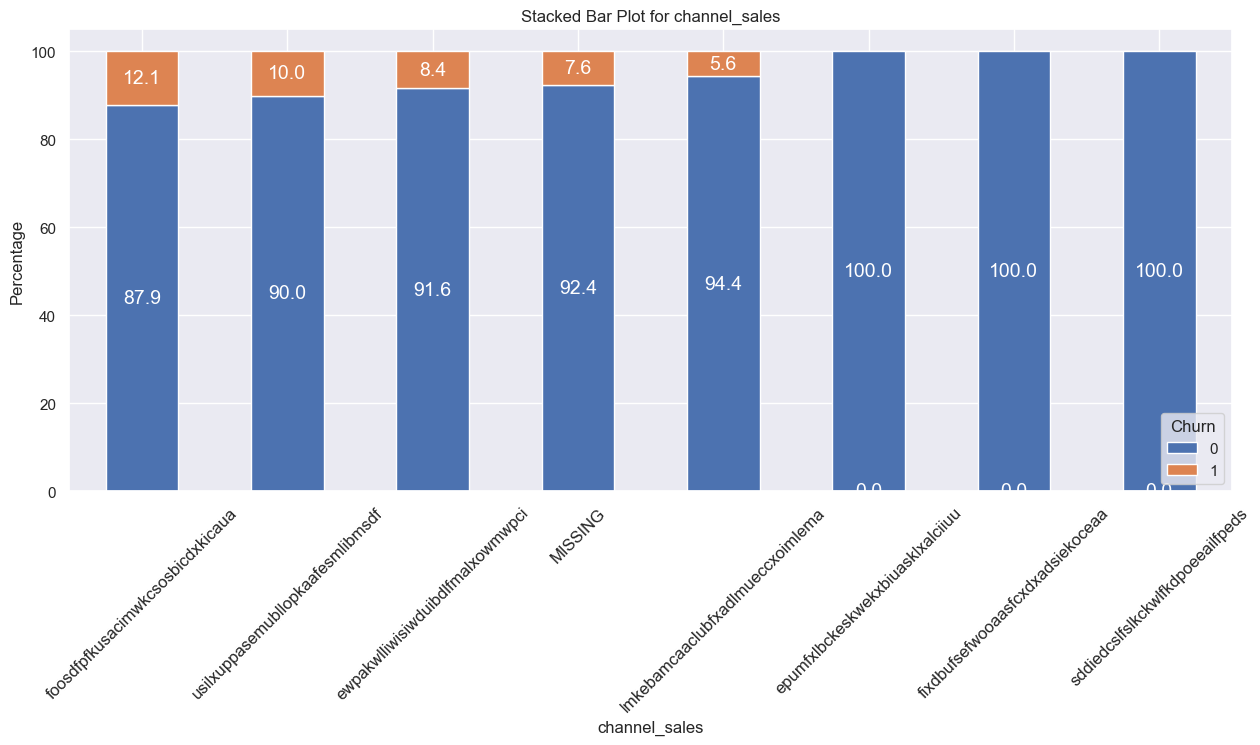

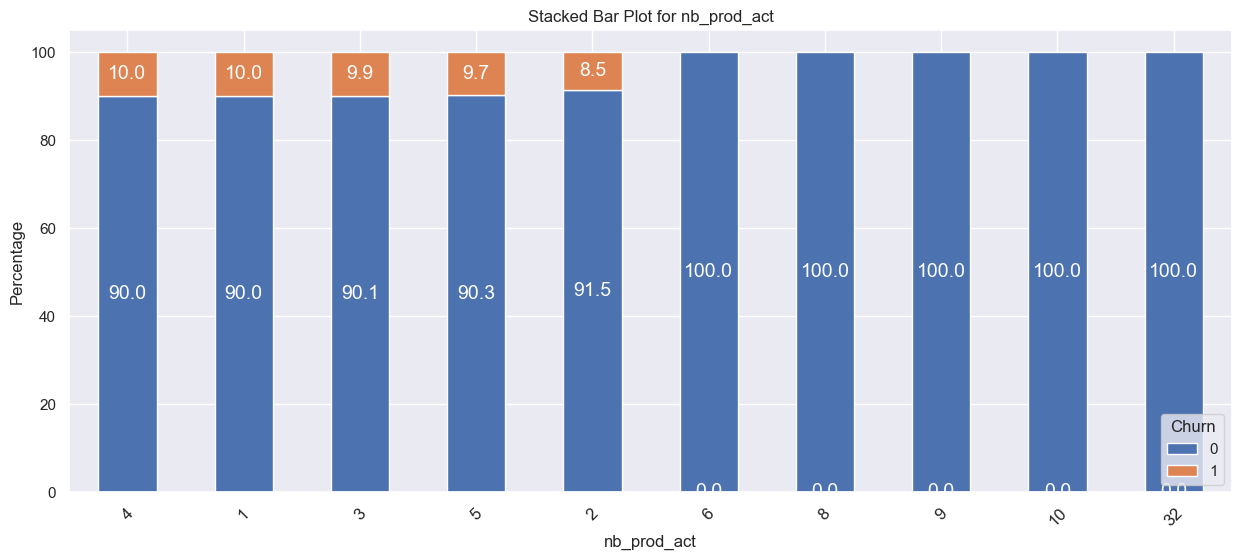

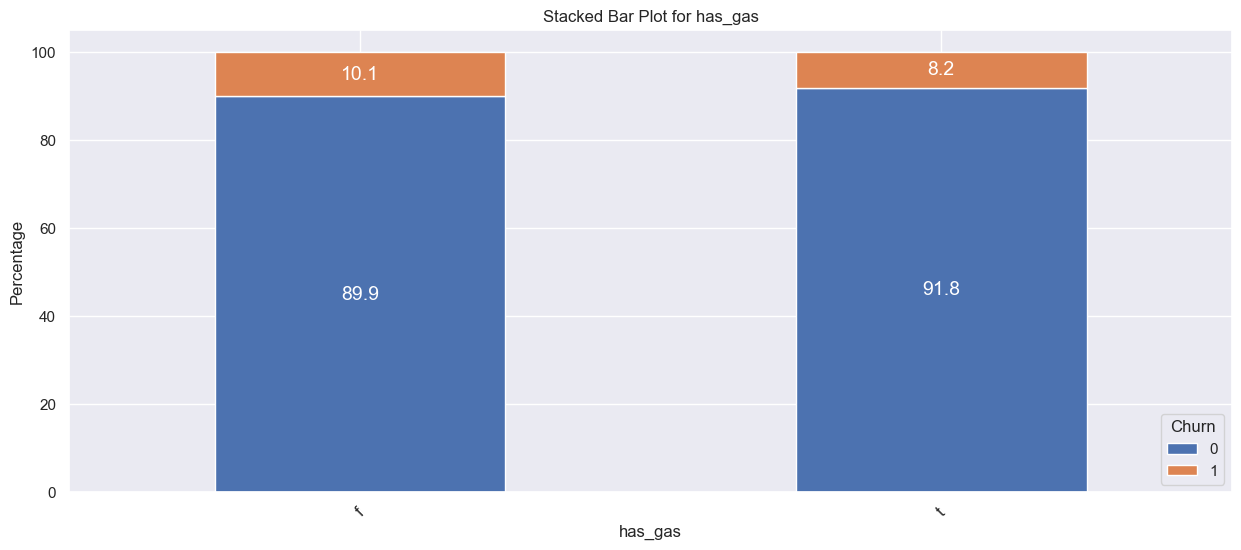

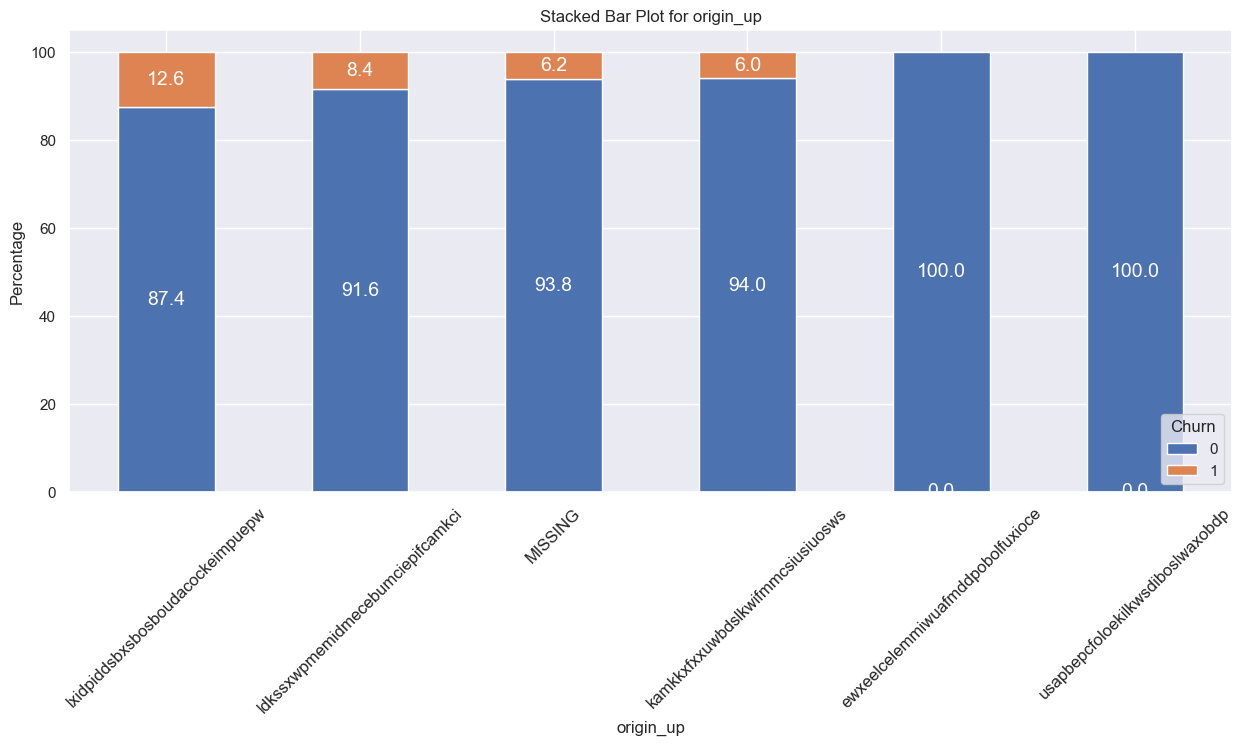

In [14]:
columns_to_pair = ['channel_sales','nb_prod_act','has_gas', 'origin_up']

# Call function
df_dictionery= paired_df(columns_to_pair)

grouped_dfs ={}
for df_names, dfs in df_dictionery.items():
    grouped_dfs[df_names] = []  
    for df in dfs:
        grouped_df = df.groupby([df.columns[-2], df.columns[-1]]).size().unstack(fill_value=0)
        grouped_df_normalized = grouped_df.apply(lambda x: x / x.sum(), axis=1) * 100
        grouped_df_sorted = grouped_df_normalized.sort_values(by = 0)
        grouped_dfs[df_names].append(grouped_df_sorted)


for title, dfs in grouped_dfs.items():
    for df in dfs:
        ax = df.plot(kind='bar', stacked=True, figsize=(15, 6))
        plt.xlabel(df.index.name)
        plt.ylabel('Percentage')
        plt.title(f'Stacked Bar Plot for {title}')
        plt.xticks(rotation = 45, fontsize=12)
        plt.legend(title='Churn', loc = 'lower right')

        # Annotate each bar with the figure represented by each stack, rounded to 2 decimal places
        for container in ax.containers:
            ax.bar_label(container, label_type='center', color='white', fmt='%.1f', fontsize=14, )

        plt.show()

In [15]:
grouped_dfs['channel_sales'][0]

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


### Analyse consumption columns

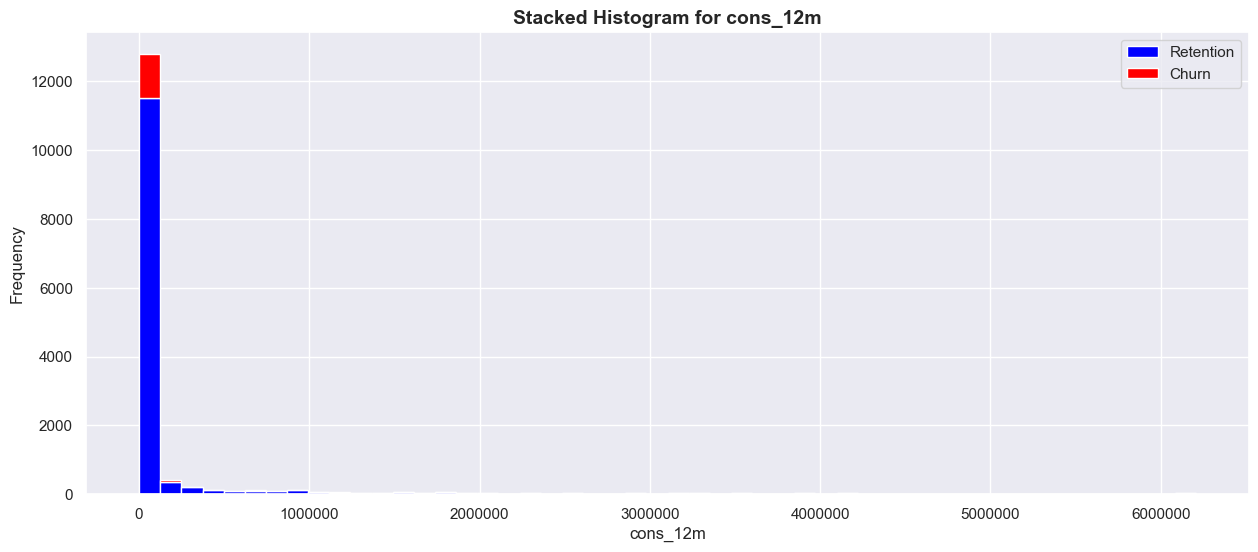

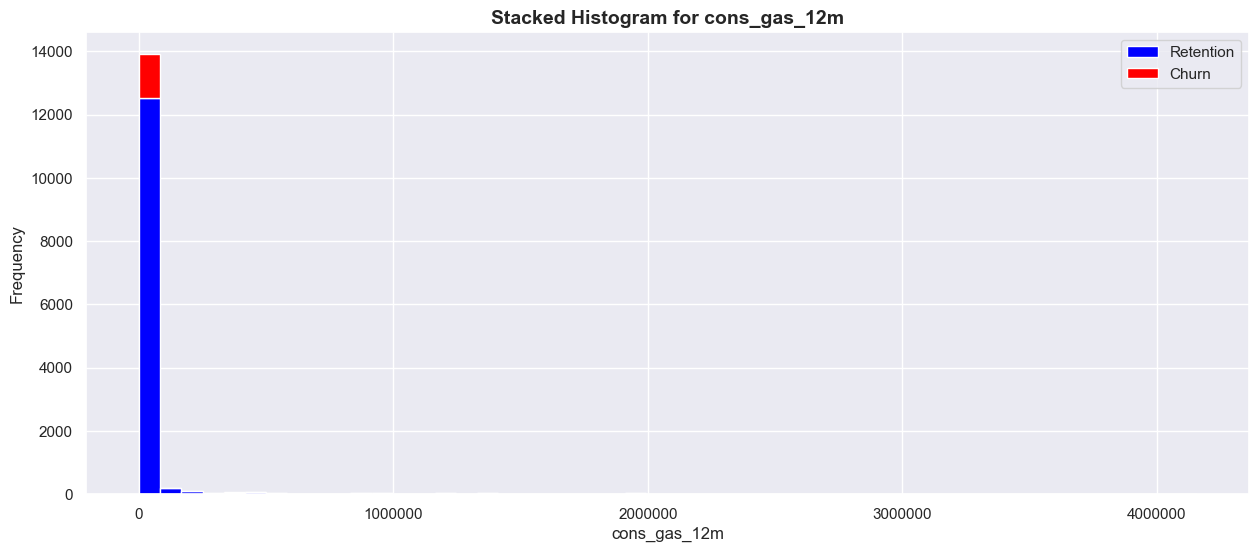

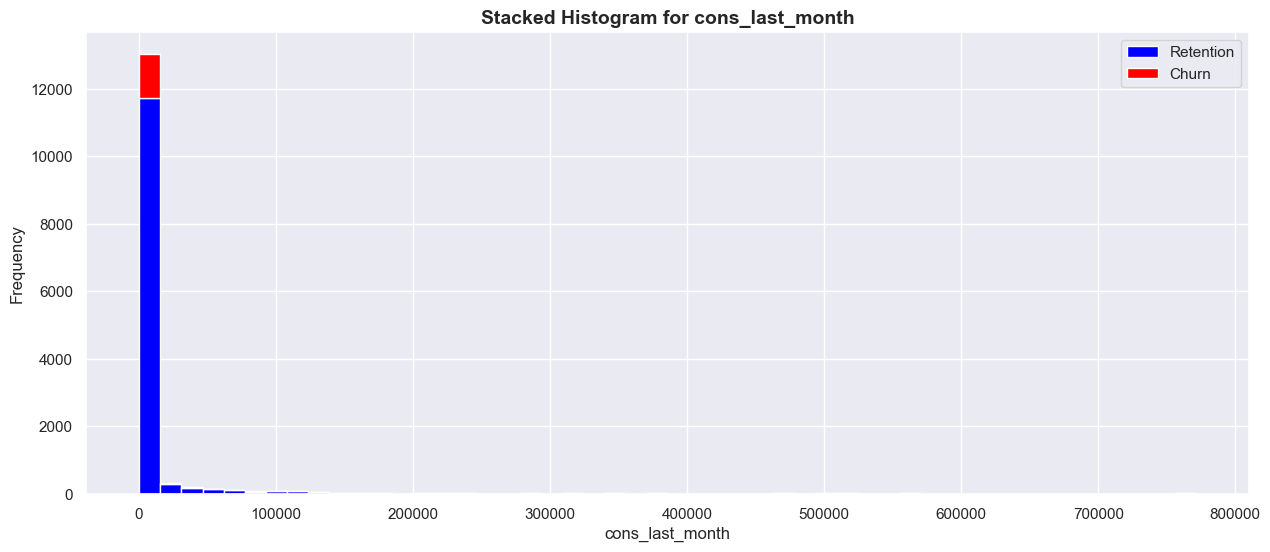

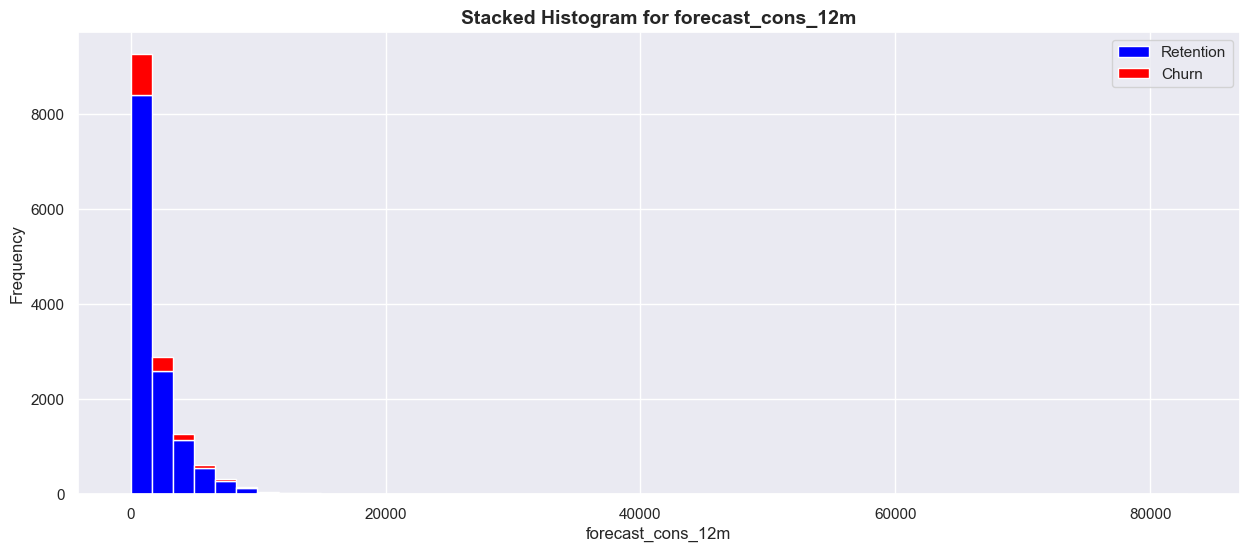

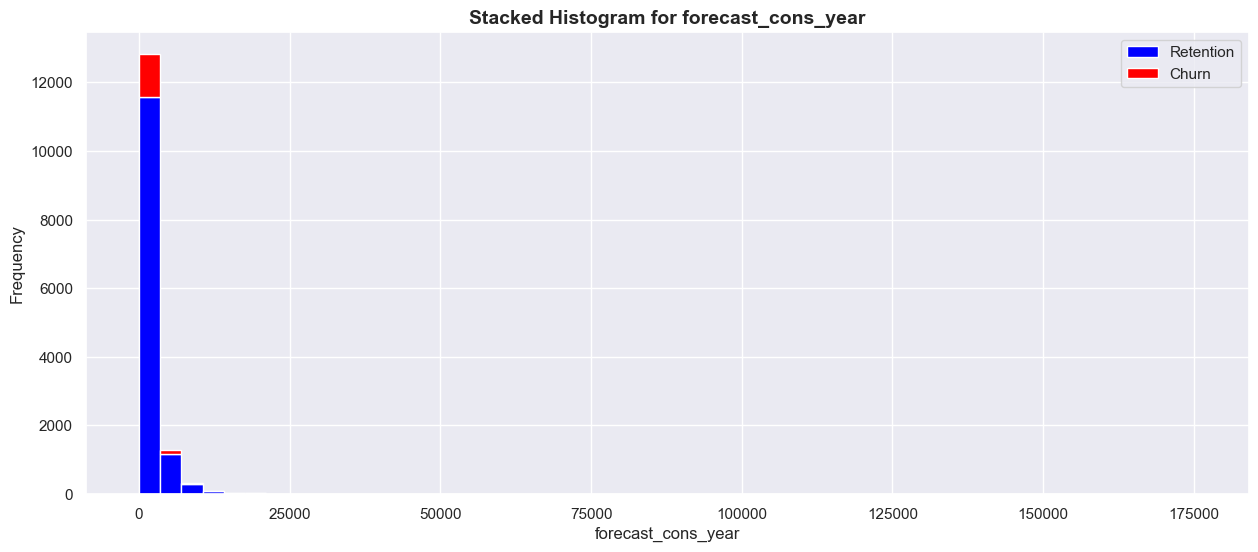

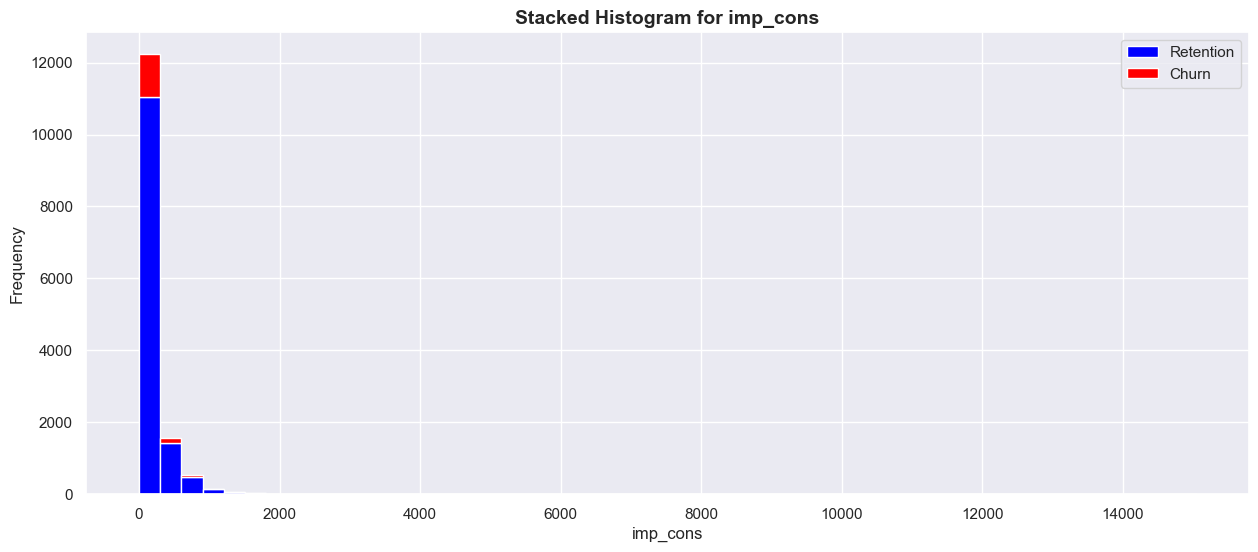

In [16]:
# call check columns function
consumption_columns = check_columns(client_df, 'cons')

# Call function that paires dataframes
consumption_df_dict = paired_df(consumption_columns)

# Call function that created histogram data frames

histogram_dfs = histogram_dataframes(consumption_df_dict)

sns.set_style('darkgrid') # Set background style   

for df_name, dfs in histogram_dfs.items():
    for df in dfs:
        data = df
        labels = ['Retention', 'Churn']
        colors = ['blue', 'red']
        bins = 50
        label = ['Retention', 'Churn']
        xlabel = f'{df_name}'
        ylabel = 'Frequency'
        title = f'Stacked Histogram for {df_name}'
        stacked_histogram(data, labels, colors, bins, xlabel, ylabel, title)

### Analyse forecast columns

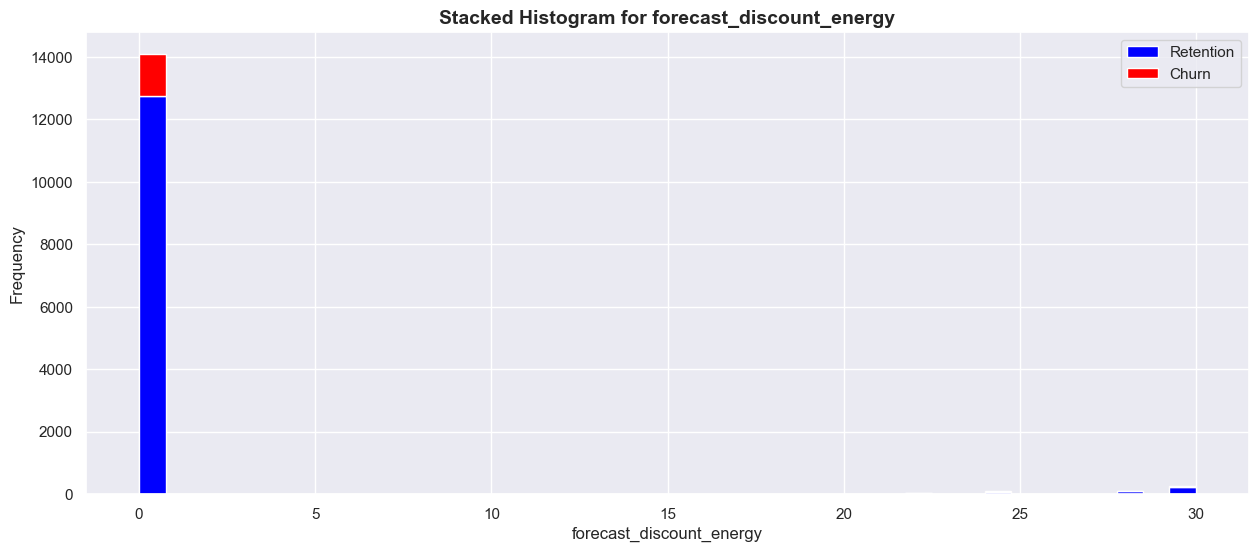

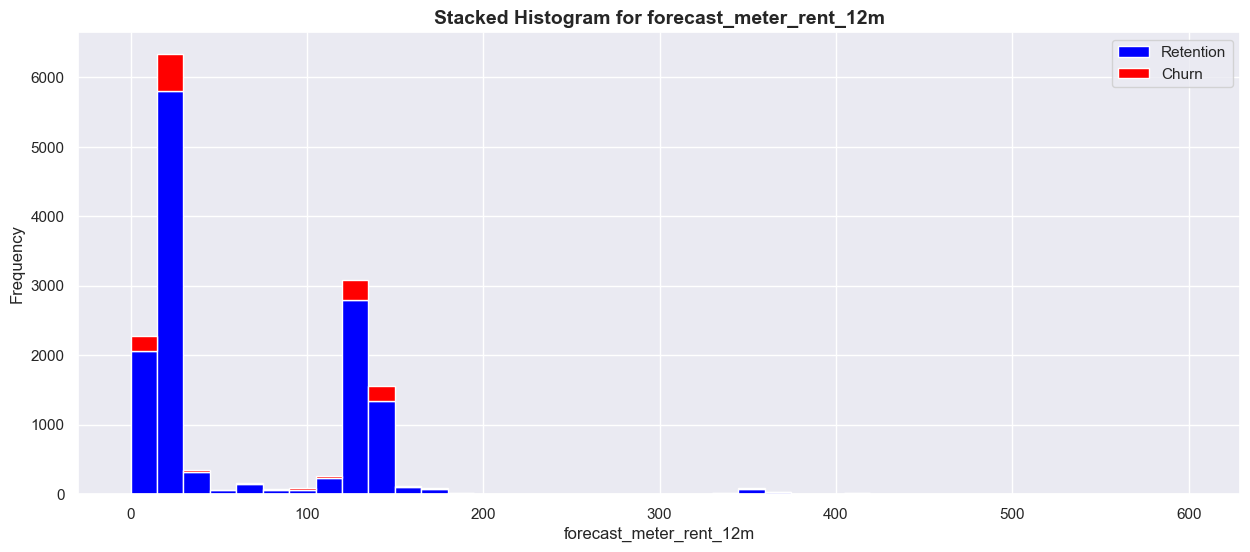

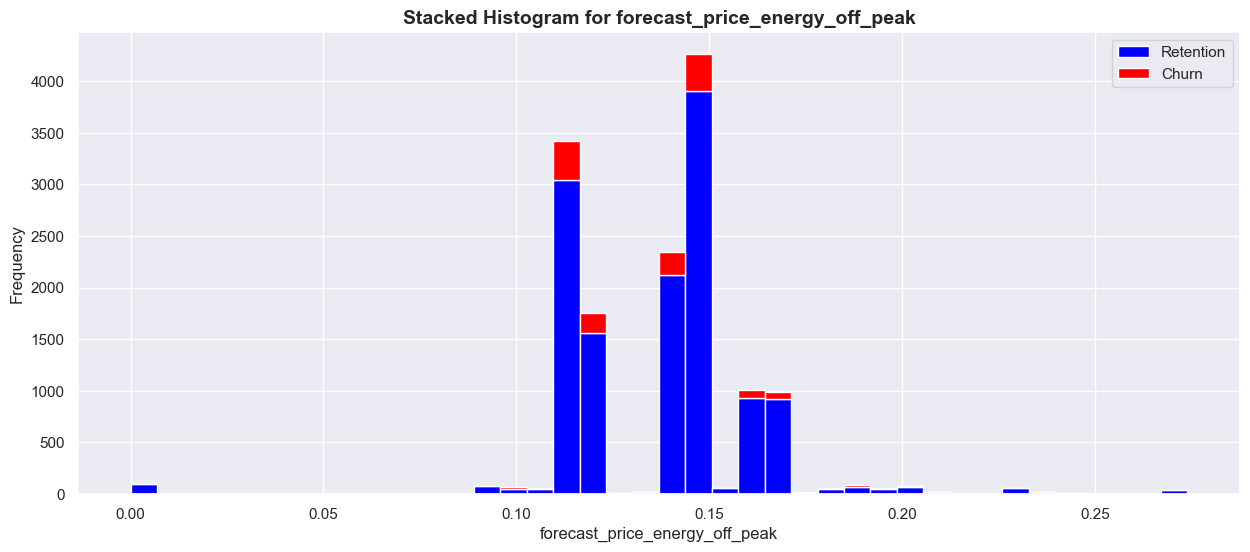

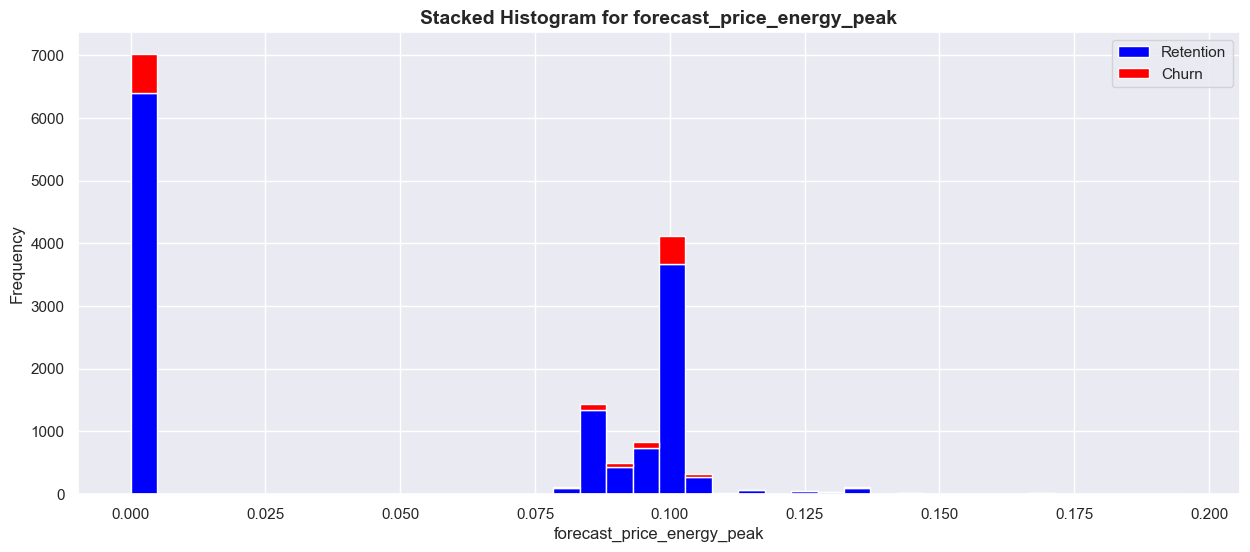

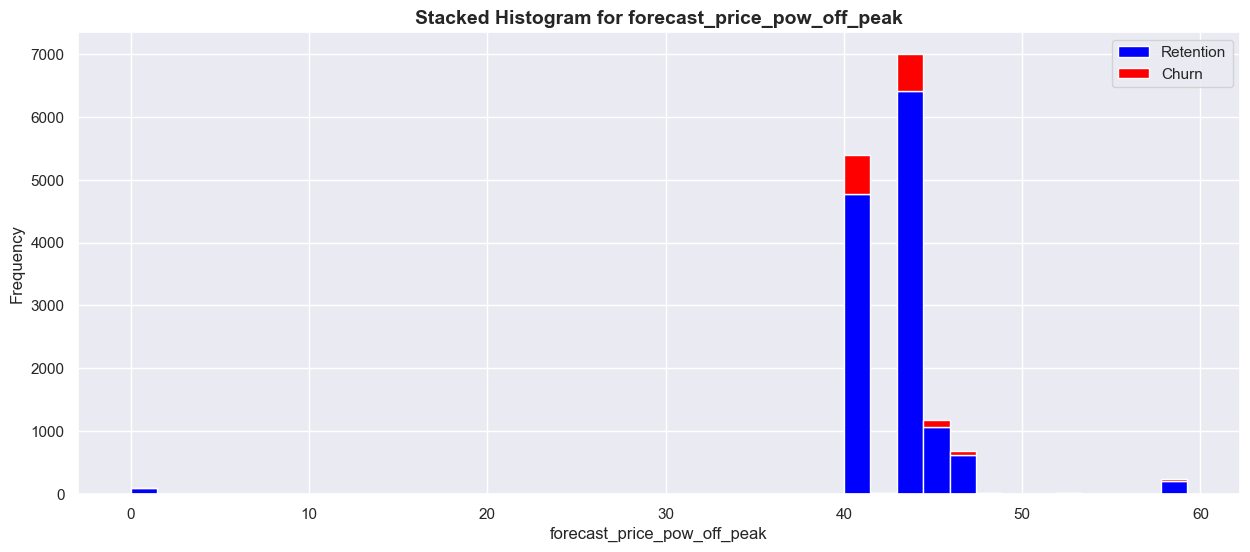

In [17]:
# call function to get desired columns
forecast_columns =  check_columns(client_df, 'forecast')
forecast_columns = forecast_columns[2:] # Since we have already checked the forecast_cons_12m and forecast_cons_year
forecast_columns

# Call function that paires dataframes
forecast_df_dict = paired_df(forecast_columns)

# Call function that created histogram data frames
forecast_hist_dfs = histogram_dataframes(forecast_df_dict)

sns.set_style('darkgrid') # Set background style

for df_name, dfs in forecast_hist_dfs.items():
    for df in dfs:
        data = df
        labels = ['Retention', 'Churn']
        colors = ['blue', 'red']
        bins = 40
        xlabel = f'{df_name}'
        ylabel = 'Frequency'
        title = f'Stacked Histogram for {df_name}'
        stacked_histogram(data, labels, colors, bins, xlabel, ylabel, title)


### Analyse Subscription margin columns

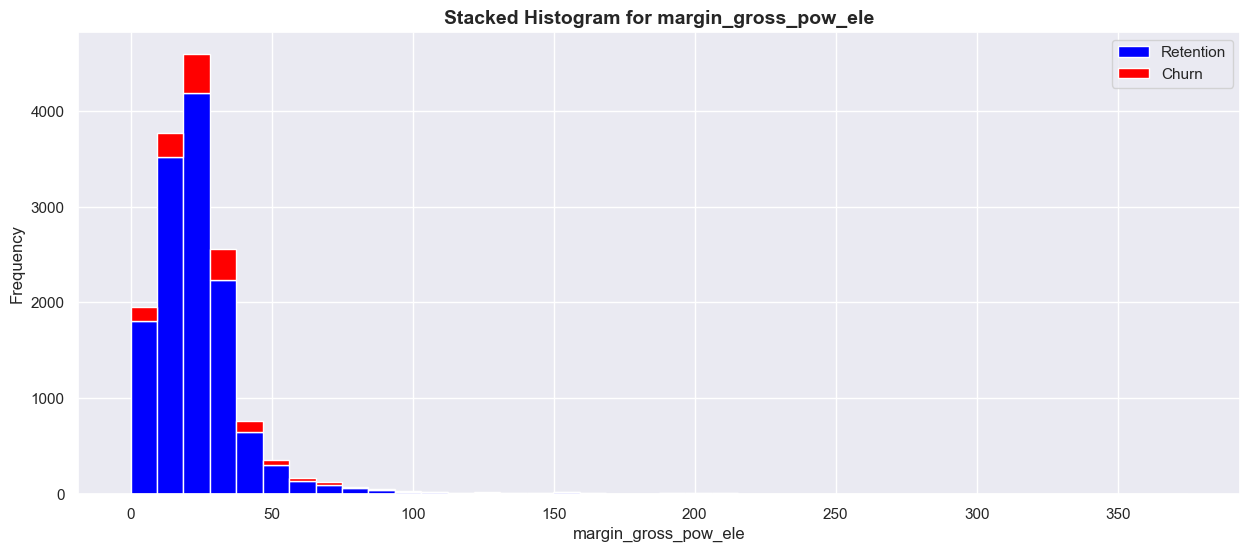

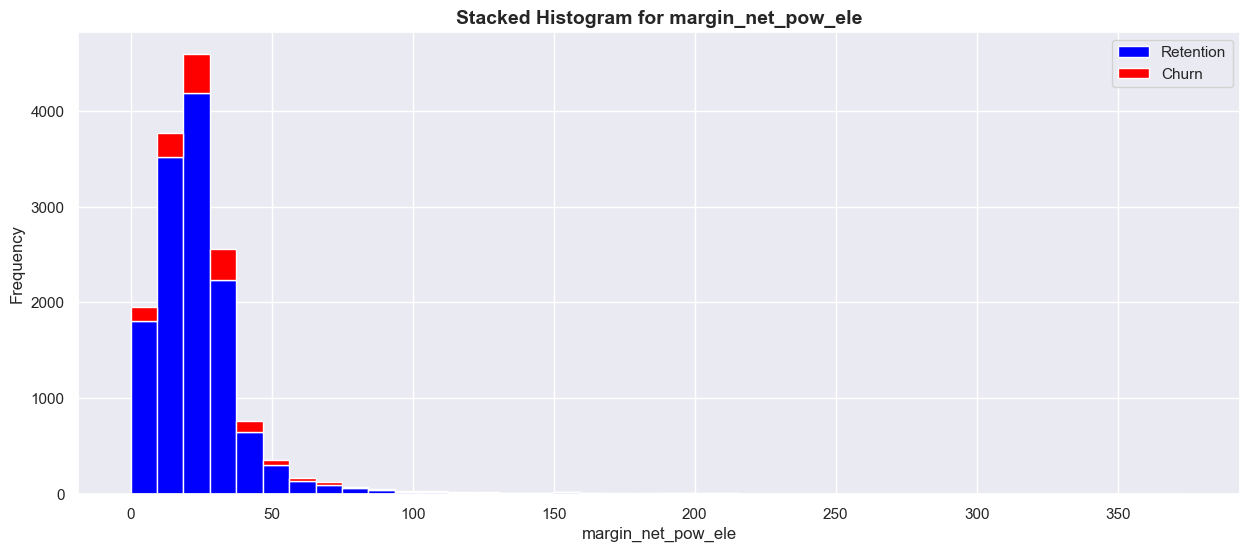

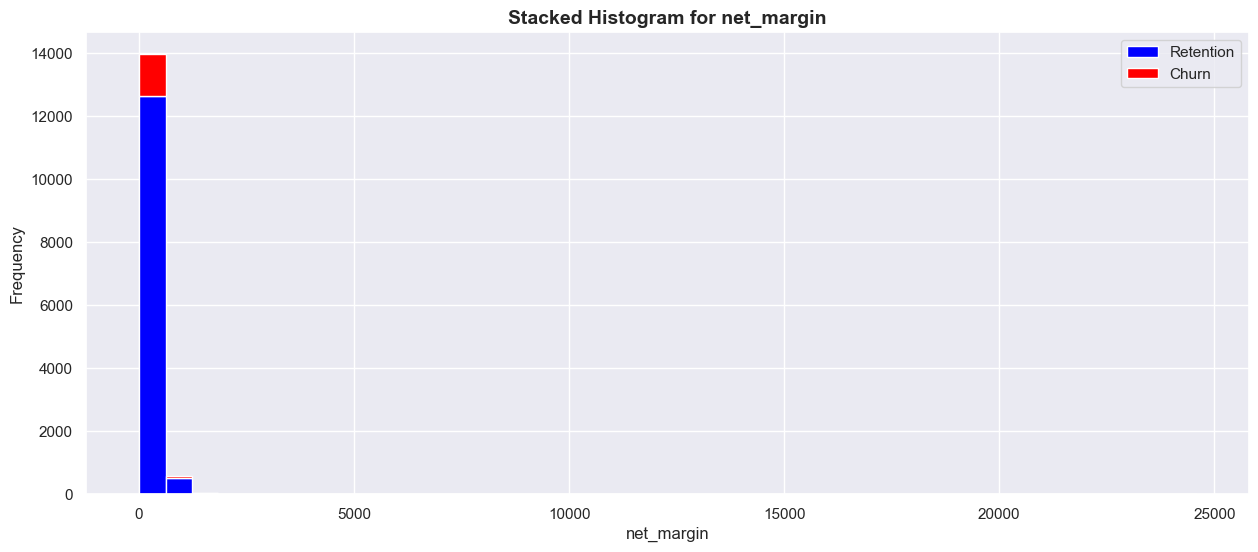

In [18]:
# call function to get desired columns
margin_columns =  check_columns(client_df, 'margin')

# Call function that paires dataframes
margin_df_dict = paired_df(margin_columns)

# Call function that created histogram data frames
margin_hist_dfs = histogram_dataframes(margin_df_dict)

sns.set_style('darkgrid') # Set background style

for df_name, dfs in margin_hist_dfs.items():
    for df in dfs:
        data = df
        labels = ['Retention', 'Churn']
        colors = ['blue', 'red']
        bins = 40
        xlabel = f'{df_name}'
        ylabel = 'Frequency'
        title = f'Stacked Histogram for {df_name}'
        stacked_histogram(data, labels, colors, bins, xlabel, ylabel, title)

From the above plots 
we can see that we have huge outliers.

Their is also a significant difference between the majority and minority class

Further there is no columns with high cardinality, that's a nice thing

We also have have columns with multicollinearity we'll drop those columns

### Analyse Date columns

In [19]:
date_columns = check_columns(client_df, 'date')

unique_years= {}
unique_months = {}
for col in date_columns:
    # change column to from object to date_time data time
    client_df[col] = pd.to_datetime(client_df[col], format = '%Y-%m-%d')
    unique_years[col] = (client_df[col].dt.year).unique()
    unique_months[col] =  (client_df[col].dt.month).unique()

for col_name, year in unique_years.items():
    print(f"{col_name} column, years: {year}")

    all_months = range(1, 13)
    result_list = []

    for _, month in unique_months.items():
        result_list.extend([mon in month for mon in all_months])

    if all(result_list):
        print(f'{col_name} has all months')
    else:
        print(f'{col_name} does not have all months')

date_activ column, years: [2013 2009 2010 2011 2012 2005 2004 2007 2008 2006 2003 2014]
date_activ has all months
date_end column, years: [2016 2017]
date_end has all months
date_modif_prod column, years: [2015 2009 2010 2011 2013 2012 2014 2004 2016 2007 2005 2008 2006 2003]
date_modif_prod has all months
date_renewal column, years: [2015 2016 2014 2013]
date_renewal has all months


In [20]:
date_columns = check_columns(client_df, 'date')
date_df = client_df[date_columns]

# Tenure, lets see how long has a company been a client 
date_df['tenure_years'] = date_df['date_end'] - date_df['date_activ']
date_df['tenure_years'] = date_df['tenure_years'] / timedelta(days=365) 

date_df['tenure_years'] = date_df['tenure_years'].astype(int)
date_df['tenure_years'].head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2244030963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['tenure_years'] = date_df['date_end'] - date_df['date_activ']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2244030963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['tenure_years'] = date_df['tenure_years'] / timedelta(days=365)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2244030963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

id
24011ae4ebbe3035111d65fa7c15bc57    3
d29c2c54acc38ff3c0614d0a653813dd    7
764c75f661154dac3a6c254cd082ea7d    6
bba03439a292a1e166f80264c16191cb    6
149d57cf92fc41cf94415803a877cb4b    6
Name: tenure_years, dtype: int32

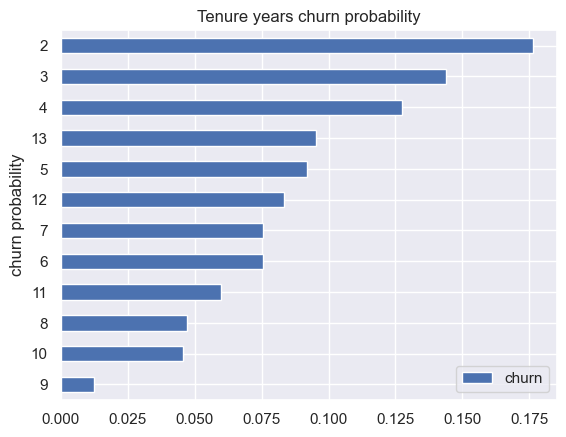

In [21]:
tenure_churn_df = pd.concat([date_df['tenure_years'], client_df['churn']], axis=1)

tenure_pivot = pd.pivot_table(
    tenure_churn_df, index = 'tenure_years', values = 'churn', aggfunc = np.mean    
).sort_values(by  = 'churn')

tenure_pivot.sort_values(by = 'churn')
tenure_pivot.plot(kind = 'barh')
plt.ylabel('churn probability')
plt.title('Tenure years churn probability');

We can see that companies that have been clients for less that 4 years have are most likely to churn


#### We don't need date columns since we are not carring out a time series analysis thus we'll have to drop them

In [22]:
print(f'Shape befoore adding tenure_column{client_df.shape}')
client_df['tenure_years'] = date_df['tenure_years'] # Add column to client df
print(f'Shape before after adding tenure_column{client_df.shape}')
client_df.drop(columns = date_columns, inplace = True)
print(f'Shape after deleting tenure_column{client_df.shape}')

Shape befoore adding tenure_column(14606, 25)
Shape before after adding tenure_column(14606, 26)
Shape after deleting tenure_column(14606, 22)


# Price df EDA 

In [23]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193002 entries, 038af19179925da21a25619c5a24b745 to 16f51cdc2baa19af0b940ee1b3dd17d5
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price_date          193002 non-null  object 
 1   price_off_peak_var  193002 non-null  float64
 2   price_peak_var      193002 non-null  float64
 3   price_mid_peak_var  193002 non-null  float64
 4   price_off_peak_fix  193002 non-null  float64
 5   price_peak_fix      193002 non-null  float64
 6   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(1)
memory usage: 11.8+ MB


In [24]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [25]:
price_df.head(2)

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,,
038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [26]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d') 

# Group off-peak prices by companies and month
# Here we get the average monthly off peak price of energy and power per company

compnany_monthly_price = price_df.groupby(
    ['id', 'price_date']).agg({'price_off_peak_var': 'mean',
                                'price_off_peak_fix': 'mean'}
                                ).reset_index()

# Filter January and December data as asked
jan_mask = compnany_monthly_price['price_date'].dt.month == 1
dec_mask = compnany_monthly_price['price_date'].dt.month == 12

jan_df = compnany_monthly_price[jan_mask]
dec_df = compnany_monthly_price[dec_mask]

print(jan_df.shape)
print(dec_df.shape)

'''
We can see that we have missing values in the since we excpect to have 16096 columns,
This could be as a result of not all companies have their 1st price and last price purchase in Jan and Dec respectively.
We however want to take into account of all customers
'''
# Get the missing id_dfs for both jan and dec dfs
jan_missing_ids_dfs = compnany_monthly_price[~compnany_monthly_price['id'].isin(jan_df['id'])]
dec_missing_ids_dfs = compnany_monthly_price[~compnany_monthly_price['id'].isin(dec_df['id'])]

#Extract the 1st  and last row of each
jan_missing_ids_dfs = jan_missing_ids_dfs.sort_values(by ='price_date')
dec_missing_ids_dfs = dec_missing_ids_dfs.sort_values(by = 'price_date')
jan_missing_id_df = jan_missing_ids_dfs.groupby('id').first().reset_index()
dec_missing_ids_df = dec_missing_ids_dfs.groupby('id').last().reset_index()


_1st_month_df = pd.concat([jan_df, jan_missing_id_df]) # conctat jan dataframes
last_month_df = pd.concat([dec_df, dec_missing_ids_df]) # conctat jan dataframes

# Create a df with the difference between 1st and last price difference 

jan_col = {
    'price_off_peak_var': 'jan_energy',
    'price_off_peak_fix': 'jan_power'
}

dec_col = {
    'price_off_peak_var': 'dec_energy',
    'price_off_peak_fix': 'dec_power'
}
# Merge January and December data
price_diff_df = pd.merge(_1st_month_df.rename(columns=jan_col),
            last_month_df.rename(columns=dec_col).drop(columns='price_date'),
             on='id')

print(price_diff_df.shape)

price_diff_df['energy_diff_off_peak'] = (price_diff_df['dec_energy'] - price_diff_df['jan_energy'])
price_diff_df['power_diff_off_peak']=  (price_diff_df['dec_power'] - price_diff_df['jan_power'])

price_diff_df = price_diff_df[['id','energy_diff_off_peak' , 'power_diff_off_peak']]
print(price_diff_df.shape)

#Viola

(16070, 4)
(16094, 4)
(16096, 6)
(16096, 3)


In [27]:
# Add this columns to client df
print(f'Shape before merging with price_diff df {client_df.shape}')
client_df = pd.merge(client_df, price_diff_df[price_diff_df.columns], on='id')
print(f'Shape after merging with price_diff df {client_df.shape}')

Shape before merging with price_diff df (14606, 22)
Shape after merging with price_diff df (14606, 25)


In [28]:
price_df.columns

Index(['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [29]:
# Average price change accross consecutive periods
mean_price_by_id = price_df.drop(columns = 'price_date')
mean_price_by_id = mean_price_by_id.groupby(['id']).mean()

energy_columns =  check_columns(mean_price_by_id, 'var')
power_columns = check_columns(mean_price_by_id, 'fix')


def change_colums_name(col_name_list, _str, replace_str):
    new_col_name_list = []
    for col_name in col_name_list:
        new_col_name_list.append(col_name.replace( _str, replace_str))
    
    return new_col_name_list

energy_columns = change_colums_name(energy_columns, 'var', 'energy')
power_columns = change_colums_name(power_columns, 'fix', 'power')
all_columns = energy_columns + power_columns

# Replace column names in DataFrame
if len(all_columns) == len(mean_price_by_id.columns):
    mean_price_by_id.columns = all_columns


In [30]:
mean_price_by_id.columns

Index(['price_off_peak_energy', 'price_peak_energy', 'price_mid_peak_energy',
       'price_off_peak_power', 'price_peak_power', 'price_mid_peak_power'],
      dtype='object')

In [31]:
energy_df = mean_price_by_id[energy_columns]
power_df= mean_price_by_id[power_columns]
print(energy_df.columns)
print(power_df.columns)

Index(['price_off_peak_energy', 'price_peak_energy', 'price_mid_peak_energy'], dtype='object')
Index(['price_off_peak_power', 'price_peak_power', 'price_mid_peak_power'], dtype='object')


In [32]:
# Calculate difference between consecutive periods
def add_difference_columns(df):
    for i in range(len(df.columns) - 1):
        new_column_name = '_'.join(df.columns[i].split('_')[:2]) + '_' + '_'.join(df.columns[i + 1].split('_')[:3])
        df.loc[:, new_column_name] = df[df.columns[i]] - df[df.columns[i+1]]
    last_column = '_'.join(df.columns[0].split('_')[:2]) + '_' + '_'.join(df.columns[2].split('_')[:3])
    df.loc[:, last_column]= df[df.columns[0]] - df[df.columns[2]]
   
    return df

energy_df1 = add_difference_columns(energy_df)
power_df1 = add_difference_columns(power_df)
mean_price_by_id1 =pd.merge(energy_df1, power_df1, on='id', how='inner')
print(energy_df1.shape)
print(power_df1.shape)
print(mean_price_by_id1.shape)
mean_price_by_id1.head()

## Drop colums we won't be using 
mean_price_by_id1.drop(columns = all_columns, inplace = True)
print(f"mean_price_by_id1 shape after droping column: {mean_price_by_id1.shape}\n")

(16096, 6)
(16096, 6)
(16096, 12)
mean_price_by_id1 shape after droping column: (16096, 6)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2875556863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_column_name] = df[df.columns[i]] - df[df.columns[i+1]]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2875556863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_column_name] = df[df.columns[i]] - df[df.columns[i+1]]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2875556863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [33]:
# We notice X and Ys, we'll replace them with power and energy respectively
columns_replace = mean_price_by_id1.columns
mean_price_by_id1 = change_colums_name(columns_replace, 'x', 'energy')
mean_price_by_id1 = change_colums_name(columns_replace, 'y', 'power')
print(mean_price_by_id.columns)

Index(['price_off_peak_energy', 'price_peak_energy', 'price_mid_peak_energy',
       'price_off_peak_power', 'price_peak_power', 'price_mid_peak_power'],
      dtype='object')


In [34]:
# Add this columns to client df
print(f'Shape before adding merging with mean_price_by_id {client_df.shape}')

client_df = pd.merge(client_df, mean_price_by_id[mean_price_by_id.columns], on='id')
print(f'Shape after adding merging with price_diff df {client_df.shape}')

Shape before adding merging with mean_price_by_id (14606, 25)
Shape after adding merging with price_diff df (14606, 31)


In [35]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id','price_date']).mean()

# Replace column names in DataFrame
if len(all_columns) == len(mean_prices_by_month.columns):
    mean_prices_by_month.columns = all_columns


# Seperate mean_prices_by_month df into 2
energy_df = mean_prices_by_month[energy_columns]
power_df= mean_prices_by_month[power_columns]


# Calculate difference between columns
energy_df2 = add_difference_columns(energy_df)
power_df2 = add_difference_columns(power_df)
print(energy_df2.shape)
print(power_df2.shape)

print(f'Number of duplicate rows in energy df {len(energy_df2[energy_df2.index.duplicated()])}')
print(f'Number of duplicate rows in power {len(power_df2[power_df2.index.duplicated()])}')

# Due to multi_indexing we'll use thuis method as there are no duplicates
mean_prices_by_month = pd.concat([energy_df2, power_df2], axis=1)

print(mean_prices_by_month.shape)

# drop columns we won't use 
mean_prices_by_month.drop(columns = all_columns, inplace = True)
print(mean_prices_by_month.shape)

max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).max()

print(max_diff_across_periods_months.columns)
## This means we have and issue we'll have tp correct our column names 


(193002, 6)
(193002, 6)
Number of duplicate rows in energy df 0
Number of duplicate rows in power 0
(193002, 12)
(193002, 6)
Index(['price_off_price_peak_energy', 'price_peak_price_mid_peak',
       'price_off_price_mid_peak', 'price_off_price_peak_power',
       'price_peak_price_mid_peak', 'price_off_price_mid_peak'],
      dtype='object')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2875556863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_column_name] = df[df.columns[i]] - df[df.columns[i+1]]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2875556863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_column_name] = df[df.columns[i]] - df[df.columns[i+1]]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\2875556863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [36]:
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).max()
max_diff_across_periods_months.head()

,price_off_price_peak_energy,price_peak_price_mid_peak,price_off_price_mid_peak,price_off_price_peak_power,price_peak_price_mid_peak,price_off_price_mid_peak
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.022225,0.033743,0.055866,16.291555,8.145775,24.437330
0004351ebdd665e6ee664792efc4fd13,0.148405,0.000000,0.148405,44.444710,0.000000,44.444710
0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.000000,0.205742,45.944710,0.000000,45.944710
0010ee3855fdea87602a5b7aba8e42de,0.022581,0.031859,0.054440,16.291555,8.145775,24.437330
00114d74e963e47177db89bc70108537,0.149902,0.000000,0.149902,44.266931,0.000000,44.266931


In [37]:
max_diff_across_periods_months.columns

Index(['price_off_price_peak_energy', 'price_peak_price_mid_peak',
       'price_off_price_mid_peak', 'price_off_price_peak_power',
       'price_peak_price_mid_peak', 'price_off_price_mid_peak'],
      dtype='object')

In [38]:
# Onething we need to impove is our column names since they are getting repeated:
energy_part, power_part = max_diff_across_periods_months.iloc[:, :3], max_diff_across_periods_months.iloc[:, -3:]
print(energy_part.columns)
print(power_part.columns, '\n')
energy_part_col = {
    'price_off_price_peak_energy': 'price_off_price_peak_energy',
    'price_peak_price_mid_peak': 'price_peak_price_mid_peak_energy',
    'price_off_price_mid_peak' : 'price_off_price_mid_peak_energy'
}

power_part_col = {
    'price_off_price_peak_power' : 'price_off_price_peak_power',
    'price_peak_price_mid_peak' : 'price_peak_price_mid_peak_power',
    'price_off_price_mid_peak' : 'price_off_price_mid_peak_power'

}

energy_part = energy_part.rename(columns = energy_part_col)
power_part = power_part.rename(columns = power_part_col)

print(energy_part.columns)
print(power_part.columns)

max_diff_across_periods_months = pd.concat([energy_part, power_part], axis = 1)
max_diff_across_periods_months.head()

Index(['price_off_price_peak_energy', 'price_peak_price_mid_peak',
       'price_off_price_mid_peak'],
      dtype='object')
Index(['price_off_price_peak_power', 'price_peak_price_mid_peak',
       'price_off_price_mid_peak'],
      dtype='object') 

Index(['price_off_price_peak_energy', 'price_peak_price_mid_peak_energy',
       'price_off_price_mid_peak_energy'],
      dtype='object')
Index(['price_off_price_peak_power', 'price_peak_price_mid_peak_power',
       'price_off_price_mid_peak_power'],
      dtype='object')


,price_off_price_peak_energy,price_peak_price_mid_peak_energy,price_off_price_mid_peak_energy,price_off_price_peak_power,price_peak_price_mid_peak_power,price_off_price_mid_peak_power
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.022225,0.033743,0.055866,16.291555,8.145775,24.437330
0004351ebdd665e6ee664792efc4fd13,0.148405,0.000000,0.148405,44.444710,0.000000,44.444710
0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.000000,0.205742,45.944710,0.000000,45.944710
0010ee3855fdea87602a5b7aba8e42de,0.022581,0.031859,0.054440,16.291555,8.145775,24.437330
00114d74e963e47177db89bc70108537,0.149902,0.000000,0.149902,44.266931,0.000000,44.266931


In [39]:
# Final df with all features we want to build our model
print(f'Shape before adding merging with mean_price_by_id {client_df.shape}')

final_df = pd.merge(client_df, max_diff_across_periods_months[max_diff_across_periods_months.columns], on='id')
print(f'Shape after adding merging with price_diff df {final_df.shape}')

Shape before adding merging with mean_price_by_id (14606, 31)
Shape after adding merging with price_diff df (14606, 37)


#### From the analysis we've notice cosumption columns have the highest skewed data

#### Onother column with high fairly high skewed data is 'net_margin'

In [40]:
consumption_columns = check_columns(client_df, 'cons')
consumption_columns.append("net_margin")
skewed_col = consumption_columns
skewed_col

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'imp_cons',
 'net_margin']

In [41]:
# Apply log10 transformation
final_df["cons_12m"] = np.log10(final_df["cons_12m"] + 1)
final_df["cons_gas_12m"] = np.log10(final_df["cons_gas_12m"] + 1)
final_df["cons_last_month"] = np.log10(final_df["cons_last_month"] + 1)
final_df["forecast_cons_12m"] = np.log10(final_df["forecast_cons_12m"] + 1)
final_df["forecast_cons_year"] = np.log10(final_df["forecast_cons_year"] + 1)
final_df["forecast_meter_rent_12m"] = np.log10(final_df["forecast_meter_rent_12m"] + 1)
final_df["imp_cons"] = np.log10(final_df["imp_cons"] + 1)
final_df["net_margin"] = np.log10(final_df["net_margin"] + 1)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\47109313.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((final_df["cons_12m"].dropna()), ax=axs[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\47109313.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((final_df["cons_gas_12m"].drop

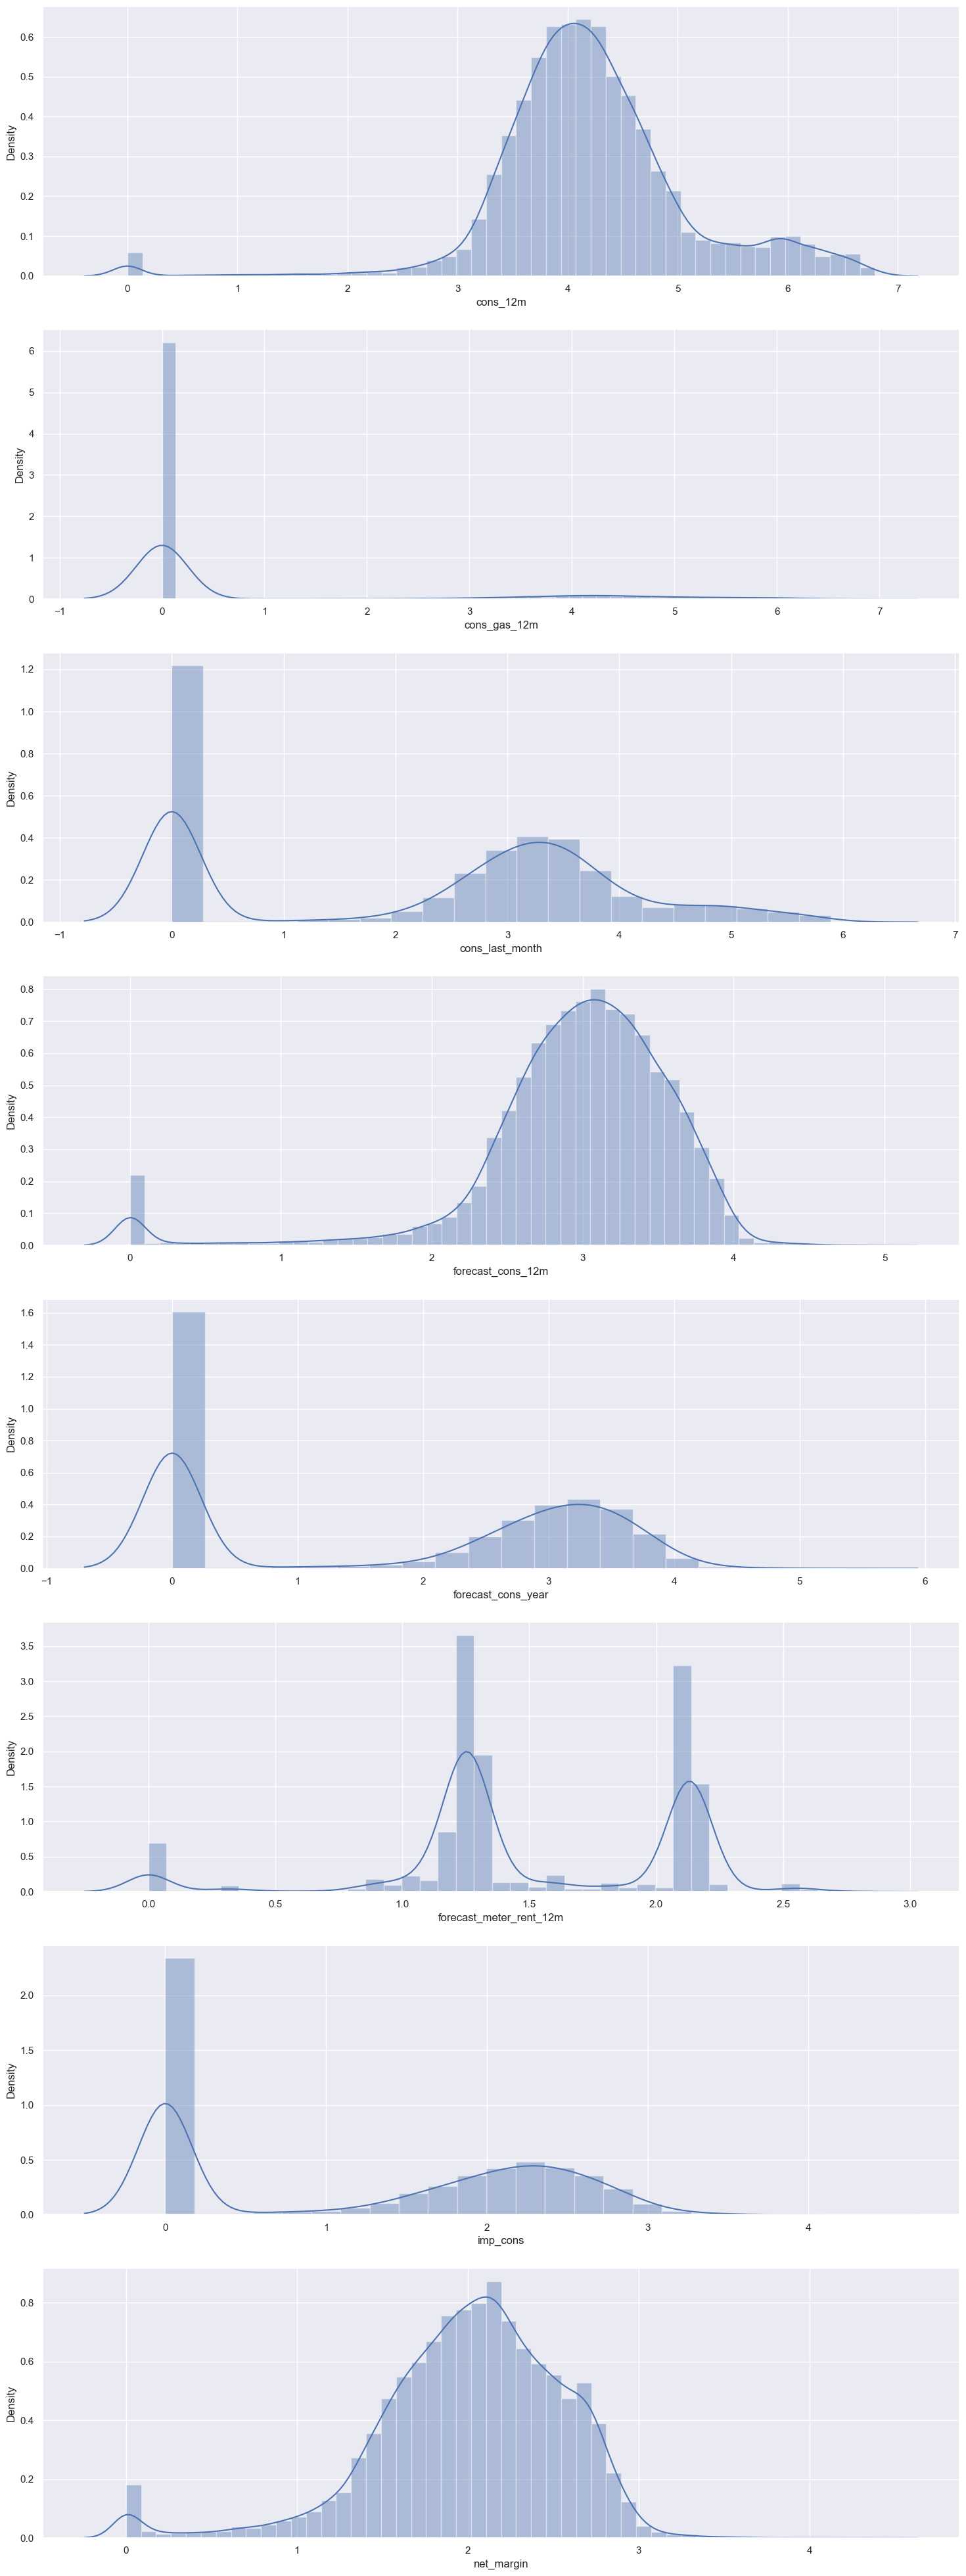

In [42]:
fig, axs = plt.subplots(nrows=8, figsize=(18, 50))
# Plot histograms
sns.distplot((final_df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((final_df["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((final_df["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((final_df["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((final_df["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((final_df["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((final_df["imp_cons"].dropna()), ax=axs[6])
sns.distplot((final_df["net_margin"].dropna()), ax=axs[7]);

In [43]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,4.223939,0.884515,0.000000,3.754023,4.149727,4.610285,6.792889
cons_gas_12m,14606.0,0.779244,1.717071,0.000000,0.000000,0.000000,0.000000,6.618528
cons_last_month,14606.0,2.264646,1.769305,0.000000,0.000000,2.899547,3.529430,5.887169
forecast_cons_12m,14606.0,2.962177,0.683592,0.000000,2.695477,3.046836,3.380716,4.918575
forecast_cons_year,14606.0,1.784610,1.584986,0.000000,0.000000,2.498311,3.242231,5.243970
forecast_discount_energy,14606.0,0.966726,5.108289,0.000000,0.000000,0.000000,0.000000,30.000000
forecast_meter_rent_12m,14606.0,1.517203,0.571481,0.000000,1.235023,1.296555,2.120673,2.778376
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.000000,0.116340,0.143166,0.146348,0.273963
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.000000,0.000000,0.084138,0.098837,0.195975
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.000000,40.606701,44.311378,44.311378,59.266378


### We might not need a standard scaler as we had thought earlier

In [44]:
final_df.set_index('id', inplace=True)

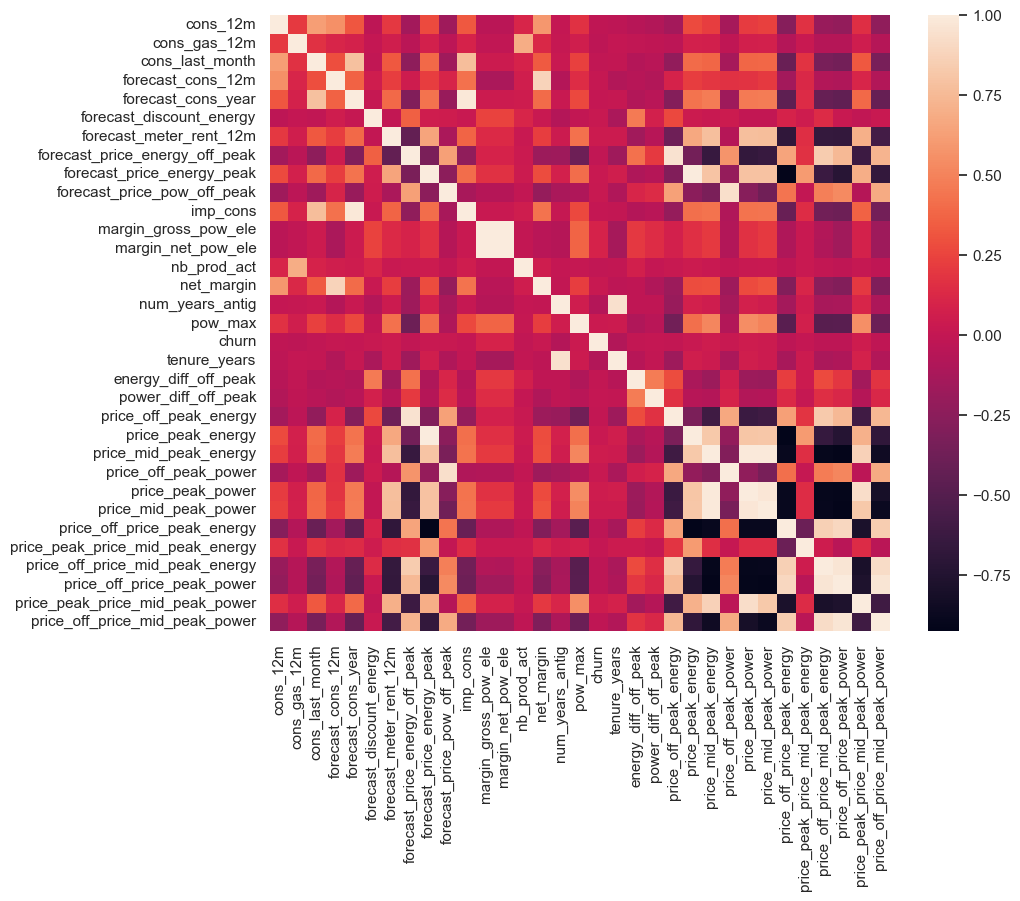

In [45]:

plt.figure(figsize=(10, 8))
correlation = final_df.select_dtypes('number').corr()
sns.heatmap(correlation);

In [46]:
# Let's just take the column that have multicolinearity
print(f" {final_df['margin_net_pow_ele'].corr(final_df['margin_gross_pow_ele'])}")
print(f"{final_df['net_margin'].corr(final_df['forecast_cons_12m'])}")
print(f"{final_df['imp_cons'].corr(final_df['forecast_cons_year'])}")
print(f"{final_df['num_years_antig'].corr(final_df['tenure_years'])}")
print(f"{final_df['forecast_price_energy_peak'].corr(final_df['price_peak_energy'])}")
print(f"{final_df['price_mid_peak_power'].corr(final_df['price_peak_power'])}")

 0.999914108785993
0.8738717516627915
0.9842664101057744
0.9467836513027251
0.9940464147736432
0.9740958993215726


In [47]:
# Columns with multicolinearity let's check how their corre;ation to the target variable
print(f"churn vs margin_net_pow_ele {final_df['churn'].corr(final_df['margin_net_pow_ele'])}")
print(f"churn vs margin_gross_pow_ele {final_df['churn'].corr(final_df['margin_gross_pow_ele'])}\n")

print(f"churn vs net_margin {final_df['churn'].corr(final_df['net_margin'])}")
print(f"churn vs forecast_cons_12m {final_df['churn'].corr(final_df['forecast_cons_12m'])}\n")

print(f"churn vs imp_cons{final_df['churn'].corr(final_df['imp_cons'])}")
print(f"churn vs forecast_cons_year{final_df['churn'].corr(final_df['forecast_cons_year'])}\n")

print(f"churn vs num_years_antig{final_df['churn'].corr(final_df['num_years_antig'])}")
print(f"churn vs tenure_years{final_df['churn'].corr(final_df['tenure_years'])}\n")

print(f"churn vs forecast_price_energy_peak{final_df['churn'].corr(final_df['forecast_price_energy_peak'])}")
print(f"churn vs price_peak_energy{final_df['churn'].corr(final_df['price_peak_energy'])}\n")

print(f"churn vs price_mid_peak_power{final_df['churn'].corr(final_df['price_mid_peak_power'])}")
print(f"churn vs price_peak_power{final_df['churn'].corr(final_df['price_peak_power'])}")


# For every pair we'll pick the value with high corellation to the target vector
# margin_net_pow_ele , net_margin, forecast_cons_year, tenure_years, price_peak_energy, price_peak_power

churn vs margin_net_pow_ele 0.09577159663854501
churn vs margin_gross_pow_ele 0.09572515487112983

churn vs net_margin 0.01822095241845706
churn vs forecast_cons_12m 0.012169053404417485

churn vs imp_cons0.00618750944035826
churn vs forecast_cons_year0.006543483783569209

churn vs num_years_antig-0.07413994744803783
churn vs tenure_years-0.0759032066771626

churn vs forecast_price_energy_peak0.02931513743797404
churn vs price_peak_energy0.029588202713659598

churn vs price_mid_peak_power0.04484180233593994
churn vs price_peak_power0.04724042183547896


In [48]:
#margin_net_pow_ele , net_margin, forecast_cons_year, tenure_years, price_peak_energy, price_peak_power
column_to_drop_due_to_multicollinearity = ['cons_last_month',
                                            'imp_cons', 
                                            'margin_net_pow_ele', 
                                            'net_margin', 
                                            'forecast_cons_year',
                                            'tenure_years',
                                            'price_peak_energy', 
                                            'price_peak_power']

In [49]:
final_df.drop(columns = column_to_drop_due_to_multicollinearity)
final_df.shape

(14606, 36)

# Split

In [50]:
X = final_df.drop(columns = 'churn')
y = final_df['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2 , random_state =  42
)

# Lets have a validation set from the X_train and y_train
X_train, X_val, y_train, y_val = train_test_split (
    X_train, y_train, test_size = 0.2 , random_state = 42
)

### Resample

We'll use and under sampler an over sampler to see which perfoms best

In [51]:
under_sampler = RandomUnderSampler(random_state = 42) # undersampler instance
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

over_sampler = RandomOverSampler(random_state = 42) # oversampler instamce
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)


### Baseline model

In [52]:
baseline_pred = round(y_train.value_counts(normalize =  True).max(), 2)
baseline_pred

0.9

### Iterate

In [53]:
# Fit on `X_train`, `y_train`
model_org = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(random_state = 42)
)
# Fit model to training data
model_org.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under =  make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(random_state = 42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(random_state = 42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['channel_sales', 'has_gas', 'origin_up'],
                                mapping=[{'col': 'channel_sales',
                                          'data_type': dtype('O'),
                                          'mapping': usilxuppasemubllopkaafesmlibmsdf    1
foosdfpfkusacimwkcsosbicdxkicaua    2
lmkebamcaaclubfxadlmueccxoimlema    3
MISSING                             4
ewpakwlliwisiwduibdlfmalxowmwpci    5
fixdbufsefwooaasfcxdxadsiekoceaa    6
sddiedcslfslkckwlf...
                                          'data_type': dtype('O'),
                                          'mapping': t      1
f      2
NaN   -2
dtype: int64},
                                         {'col': 'origin_up',
                                          'data_type': dtype('O'),
                                          'mapping': kamkkxfxxuwbdslkwifmmcsiusiuosws    1
lxidpiddsbxsbosboudacockeimpuepw    2
ldkssxwpmemidmecebumciepifcamkci    3
MISSING                             4
usapbepcfoloekilkwsdiboslwaxobdp    5
ewxeelcelemmiwuafmddpobolfuxioce    6
NaN                                -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

### Evalaute model

In [54]:
## check models perfomance against training and test sets
models = {'Original data model' : model_org, 
          'Undersampled model' : model_under, 
          'Oversampled model':model_over
          }

for key , model in models.items():
    print(f"{key} Accuracy {round(accuracy_score(y_train, model.predict(X_train)), 2)}")
    print(f"{key} Accuracy {round(accuracy_score(y_val, model.predict(X_val)), 2)}")
     

Original data model Accuracy 1.0
Original data model Accuracy 0.84
Undersampled model Accuracy 0.64
Undersampled model Accuracy 0.58
Oversampled model Accuracy 1.0
Oversampled model Accuracy 0.85


From the above observation it seams like Oversampled model perfoms the best However **it doesn't pass the baseline**

We'll tune hyper parameters to get the an accuracy score that beats the baseline

In [55]:
# let's see how deep model train by checking it's depth
model_org_max_depth = model_org.named_steps['decisiontreeclassifier'].get_depth()
model_over_max_depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
model_under_max_depth = model_under.named_steps['decisiontreeclassifier'].get_depth()

print(f'model_org max_depth: {model_org_max_depth}')
print(f'model_over max_depth: {model_over_max_depth}')
print(f'model_under max_depth: {model_under_max_depth}')



model_org max_depth: 32
model_over max_depth: 39
model_under max_depth: 22


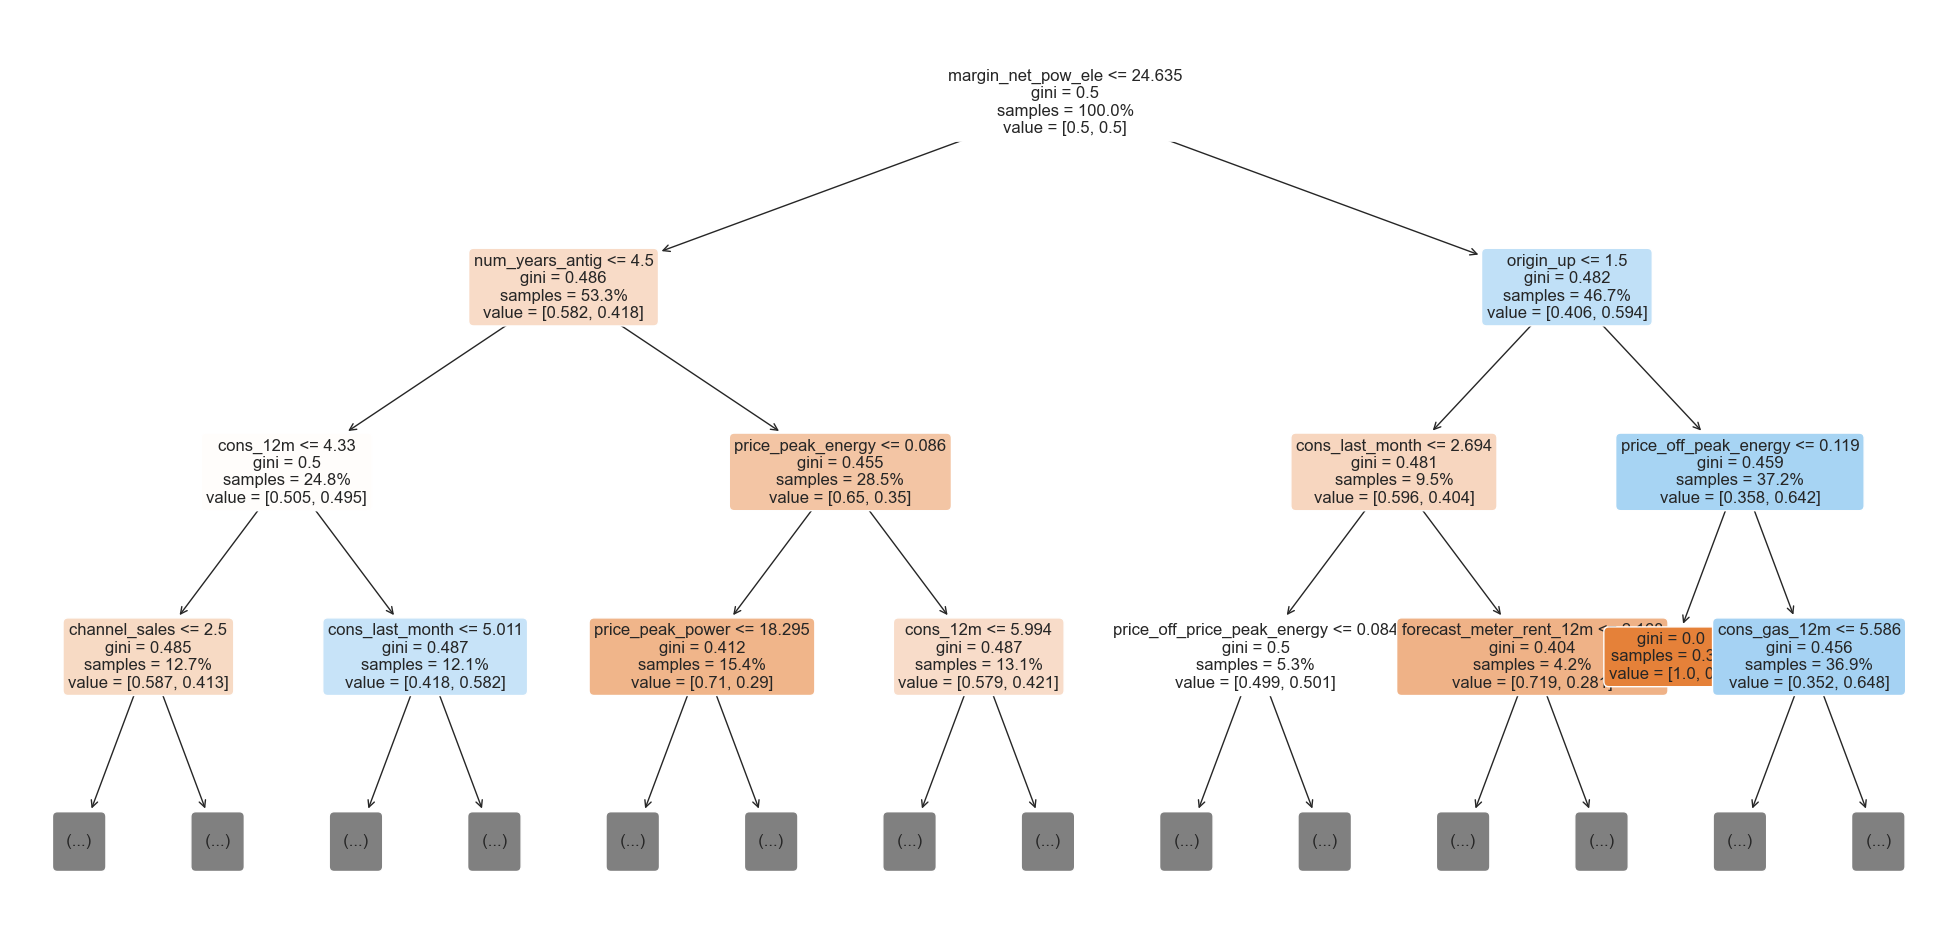

In [56]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model_over.named_steps['decisiontreeclassifier'],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [57]:
'''
Lets create a range that we'll iterate through
See if our model was overfitted or underfitted since it did not beat the baseline
 
''' 
depths = range(1, 38, 2)
train_accuracy = []
val_accuracy = []
for d in depths:
    model = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(max_depth = d, random_state = 42)
        )
    
    model.fit(X_train_over, y_train_over)
    
    train_list = accuracy_score(y_train, model.predict(X_train))
    validation_list = accuracy_score(y_val, model.predict(X_val))
    train_accuracy.append(train_list)
    val_accuracy.append(validation_list)

print(train_accuracy)
print(val_accuracy)

[0.6152776291858351, 0.5943083342248849, 0.6054348988980421, 0.6856745479833102, 0.7462287364929924, 0.7306087514710602, 0.8091366213758425, 0.8477586391355515, 0.9055311864769445, 0.9359152669305659, 0.9504653899646945, 0.9769979672622232, 0.9849149459719696, 0.9857708355622125, 0.9897293249170857, 0.992510966085375, 0.9959345244463464, 0.9987161656146357, 0.9993580828073179]
[0.6277278562259306, 0.5943517329910141, 0.599058622165169, 0.6551133932391956, 0.707744972186564, 0.6679503637141635, 0.7210098416773641, 0.7398373983739838, 0.7881899871630296, 0.8061617458279846, 0.8168592212237912, 0.8331193838254172, 0.8365425759520753, 0.8412494651262302, 0.8412494651262302, 0.842533162173727, 0.8485237483953787, 0.8485237483953787, 0.8451005562687206]


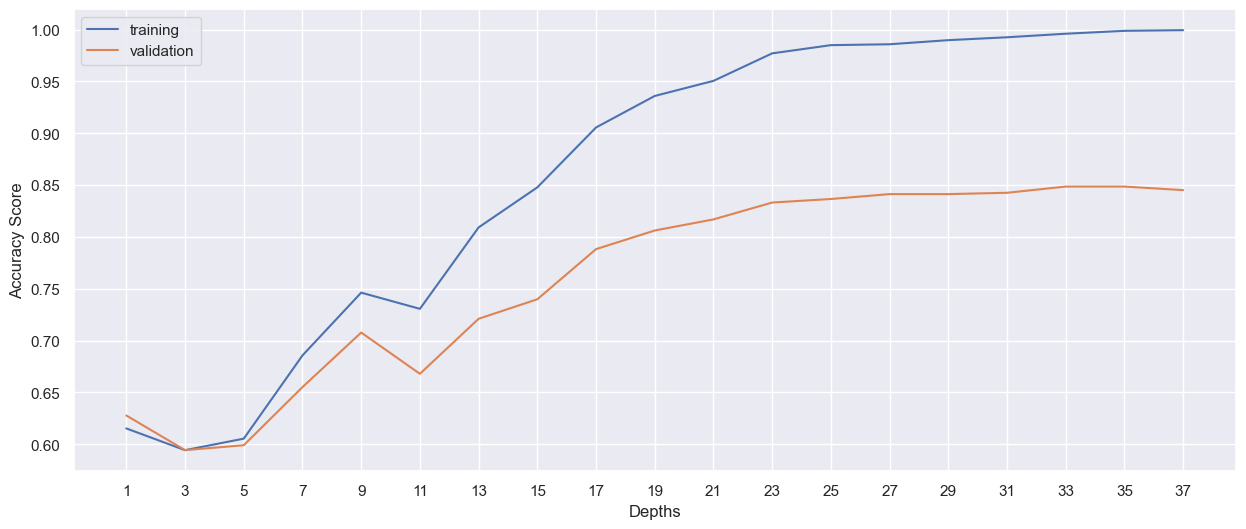

In [58]:
plt.figure(figsize=(15, 6))
plt.plot(depths, train_accuracy , label  = 'training')
plt.plot(depths, val_accuracy, label = 'validation')

plt.xlabel('Depths')
plt.ylabel('Accuracy Score')
plt.xticks(depths)
plt.legend();


In [59]:
# Create empty lists for training and validation accuracy scores
max_depth = model_over_max_depth
depth_hyperparams = range(1 , 101, 2)
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        OrdinalEncoder(), DecisionTreeClassifier(max_depth = d, random_state = 42)
    )
    # Fit model to training data
    test_model.fit(X_train_over, y_train_over)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train_over, y_train_over))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.587789872219593, 0.6289044013251301, 0.6573000473260767]
Validation Accuracy Scores: [0.6277278562259306, 0.5943517329910141, 0.599058622165169]


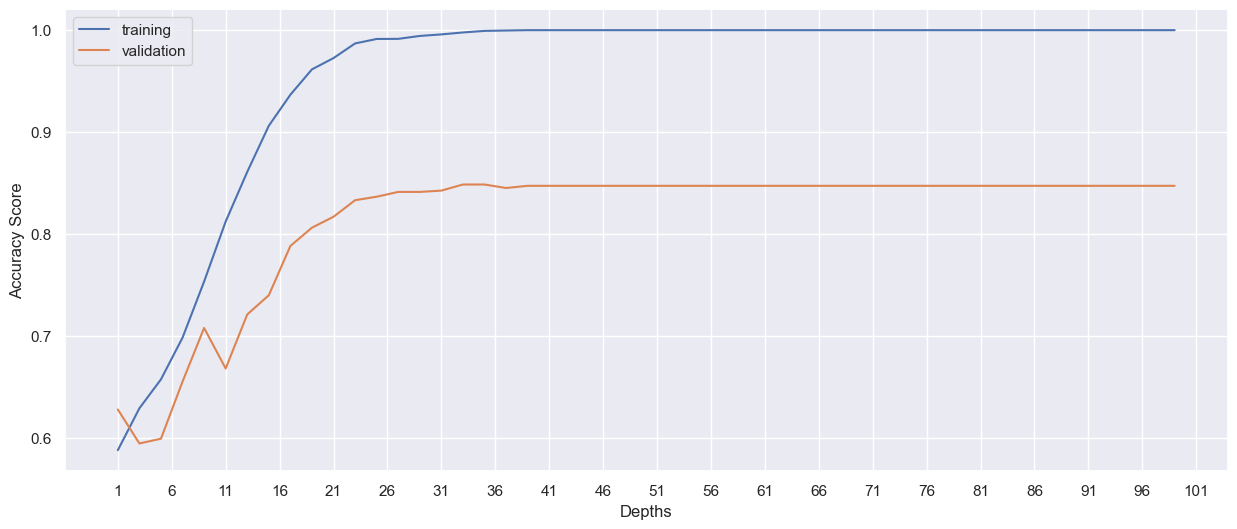

In [60]:
plt.figure(figsize=(15, 6))
plt.plot(depth_hyperparams, training_acc , label  = 'training')
plt.plot(depth_hyperparams, validation_acc, label = 'validation')

plt.xlabel('Depths')
plt.ylabel('Accuracy Score')
plt.xticks(range(1, 104, 5))  # Set x-axis ticks in steps of 5
plt.legend();

Basically we can see that this model won't give beat the baseline since after max_depth 27 the accuracy score remains the same`as it hist a plateau

## We'll try out a claffier ie Random Forest Classifier See how if will perfome will undersampled data

In [61]:
classifier_pipeline = make_pipeline(
    OrdinalEncoder(), RandomForestClassifier(random_state = 42)
)
classifier_pipeline

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [62]:
## Since we don't need our validation set we'll re_plit data and use GridSearch to get the best hyper parameters,
## This we'll help us increase our training set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2 , random_state =  42
)

hyper_parameters = {
    'randomforestclassifier__n_estimators': range(20, 100, 20),
    'randomforestclassifier__max_depth': range(10, 50 ,10)
}
hyper_parameters


{'randomforestclassifier__n_estimators': range(20, 100, 20),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [63]:
model = GridSearchCV(
    classifier_pipeline,
    param_grid = hyper_parameters,
    cv = 5,
    n_jobs = -1,
    verbose = 1

)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(20, 100, 20)},
             verbose=1)

In [64]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(20, 100, 20)},
             verbose=1)

In [65]:
print(round(model.best_score_, 3),'\n')
print(model.best_estimator_)

0.994 

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['channel_sales', 'has_gas', 'origin_up'],
                                mapping=[{'col': 'channel_sales',
                                          'data_type': dtype('O'),
                                          'mapping': usilxuppasemubllopkaafesmlibmsdf    1
foosdfpfkusacimwkcsosbicdxkicaua    2
lmkebamcaaclubfxadlmueccxoimlema    3
MISSING                             4
ewpakwlliwisiwduibdlfmalxowmwpci    5
fixdbufsefwooaasfcxdxadsiekoceaa    6
sddiedcslfslkckwlf...
dtype: int64},
                                         {'col': 'origin_up',
                                          'data_type': dtype('O'),
                                          'mapping': kamkkxfxxuwbdslkwifmmcsiusiuosws    1
lxidpiddsbxsbosboudacockeimpuepw    2
ldkssxwpmemidmecebumciepifcamkci    3
MISSING                             4
usapbepcfoloekilkwsdiboslwaxobdp    5
ewxeelcelemmiwuafmddpobolfuxioce    6
NaN             

In [66]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 3))

Training Accuracy: 1.0
Test Accuracy: 0.898


## Very Very Close but no Cigar

but from my view this should do the task it's perfoming better done the decision tree

### Plot ConfusionMatrixDisplay

In [67]:
y_test.value_counts()

churn
0    2617
1     305
Name: count, dtype: int64

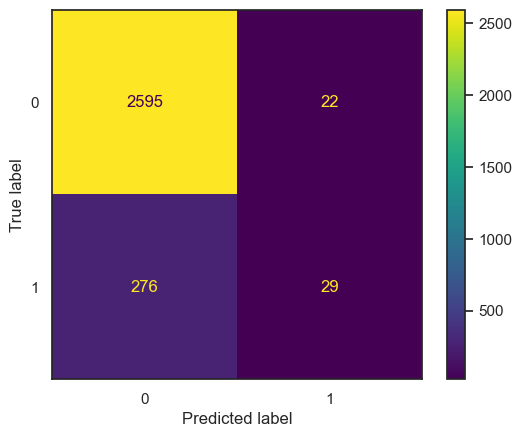

In [68]:
sns.set_style('white')
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [69]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2617
           1       0.57      0.10      0.16       305

    accuracy                           0.90      2922
   macro avg       0.74      0.54      0.55      2922
weighted avg       0.87      0.90      0.86      2922



### From the above we could tell our model is perfoming extremely poor than we expect with a recall of 0.1

In [70]:
print(f'Decision tree over_sampled model Report: \n {classification_report(y_test, model_over.predict(X_test))}\n')
print(f'Decision tree unresampled model Report: \n {classification_report(y_test, model_over.predict(X_test))}\n')
print(f'Decision tree under_sampled model Report: \n {classification_report(y_test, model_under.predict(X_test))}')


Decision tree over_sampled model Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      2617
           1       0.18      0.16      0.17       305

    accuracy                           0.84      2922
   macro avg       0.54      0.54      0.54      2922
weighted avg       0.83      0.84      0.83      2922


Decision tree unresampled model Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      2617
           1       0.18      0.16      0.17       305

    accuracy                           0.84      2922
   macro avg       0.54      0.54      0.54      2922
weighted avg       0.83      0.84      0.83      2922


Decision tree under_sampled model Report: 
               precision    recall  f1-score   support

           0       0.92      0.55      0.69      2617
           1       0.13      0.58      0.21       305

    accuracy                           0.56      29

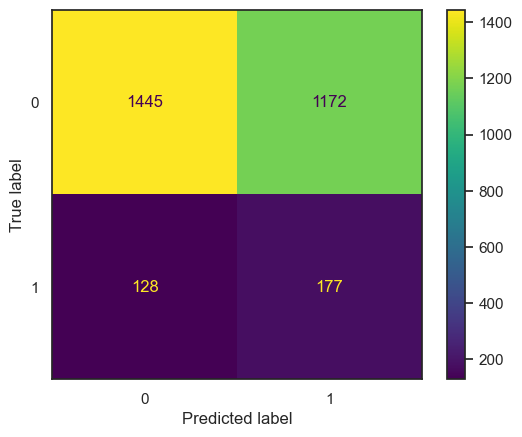

In [71]:
sns.set_style('white')
ConfusionMatrixDisplay.from_estimator(model_under, X_test, y_test);

### Since we are interested in the churn, we'd rather have a less accuracy score but a high recall. thus of all the models trained, I'd recommend 'decisiontree model_under' which is under sampled but gives us a better recall score even with a little threshold adjustment it will give us the desired permonce

In [75]:
## Let's check which columns have the most influence  on our model
features = X_train.columns
importances = model_under.named_steps['decisiontreeclassifier'].feature_importances_

feature_importances = pd.DataFrame({
    'importances' : importances,
    'features' : features
    
}).sort_values(by = 'importances', ascending = False)
top_10_feat_imp= feature_importances.head(10)
top_10_feat_imp

,importances,features
1,0.120787,cons_12m
7,0.083122,forecast_meter_rent_12m
13,0.070347,margin_gross_pow_ele
16,0.066558,net_margin
19,0.065140,pow_max
21,0.059070,energy_diff_off_peak
3,0.054849,cons_last_month
23,0.049112,price_off_peak_energy
4,0.042402,forecast_cons_12m
14,0.040887,margin_net_pow_ele


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9928\242871235.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad = 0.02)


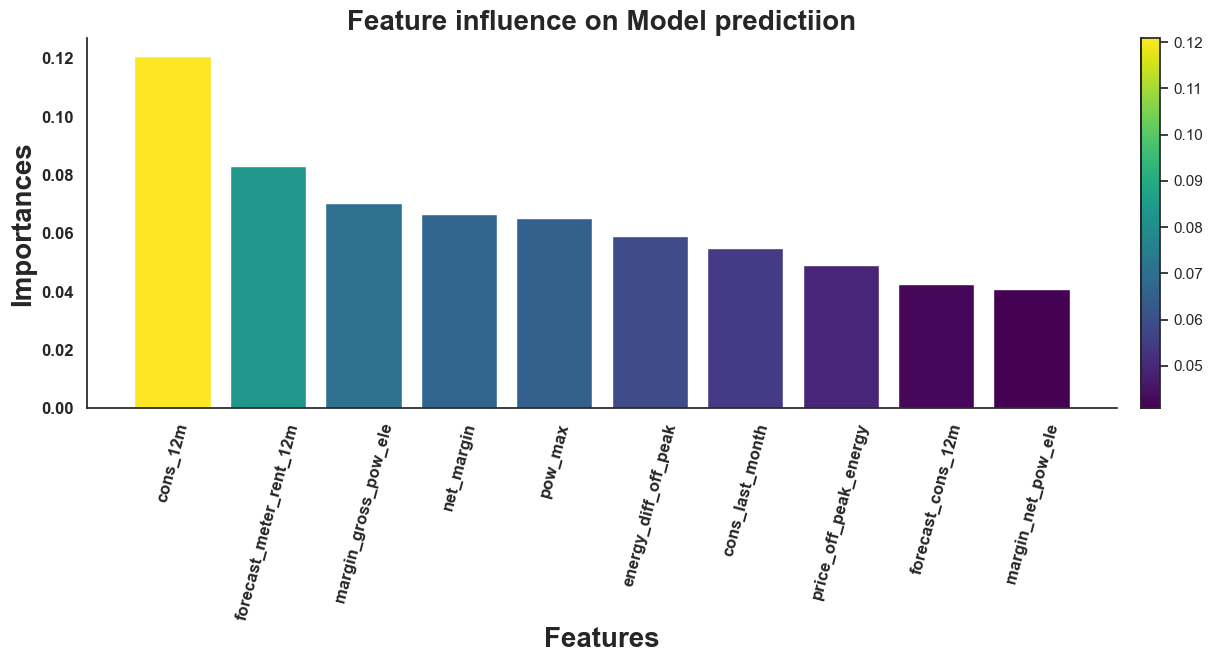

In [76]:


sns.set_style('white')
plt.figure(figsize = (16, 4.8))
norm = Normalize(vmin = top_10_feat_imp["importances"].min(),
                 vmax = top_10_feat_imp["importances"].max())
sm = ScalarMappable(cmap = 'viridis', norm = norm)
sm.set_array([])
bars = plt.bar(x = top_10_feat_imp["features"],
               height = top_10_feat_imp["importances"],
               color = sm.to_rgba(top_10_feat_imp["importances"]))
cbar = plt.colorbar(sm, orientation='vertical', pad = 0.02)
plt.xticks(rotation = 75, 
           weight = 'bold',
          fontsize = 12)
plt.yticks(weight = 'bold', 
          fontsize = 12)
plt.title("Feature influence on Model predictiion", fontsize = 20, weight = "bold")
plt.xlabel("Features", 
           fontsize = 20,
          weight = 'bold')
plt.ylabel("Importances",
          fontsize = 20,
          weight = 'bold')
sns.despine()
plt.show()

#### The above above plot show the top 10 most influential features in our model prediction  